<a href="https://colab.research.google.com/github/chenhe2018/colab/blob/main/Disco_Diffusion_v5_1_%5BMeaningJun%E5%85%AC%E5%BC%80%E7%89%88V1_3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disco Diffusion v5.1 Now with Turbo - MeaningJun公开版V1.3 


为了防止混淆, Disco 是这个笔记本的名字编辑. 使用的 diffusion 模型是 Katherine Crowson's fine-tuned 512x512 模型

如有问题，请加入[Disco Diffusion Discord].(https://discord.gg/msEZBy4HxA) 或者在Twitter上给我们留言.[@somnai_dreams](https://twitter.com/somnai_dreams) or [@gandamu](https://twitter.com/gandamu_ml)

**欢迎试用 MeaningJun 公开版 这个版本经过我的长时间使用以及我个人进行了简单的本地化工作处理！这个版本将会不断迭代与完善！感谢您的使用.**


---


*如果直接使用这个文档是不会保存你们修改的参数，所以建议请在使用前点击 左上角 文件-在云端硬盘中储存一份副本 使用拷贝到网盘的副本是可以保存你们修改的参数的~*

*如果在使用中出现了问题可以点击右上角的评论在对应的位置留言~当你们留言时我会收到邮件提醒 并会在第一时间查看（拷贝到网盘的副本是无效的）*

*欢迎大家为本版本增加Tips 现已开放备注或评论功能*

#  禁止点击其他人评论的上的解决！因为评论会消失！

---


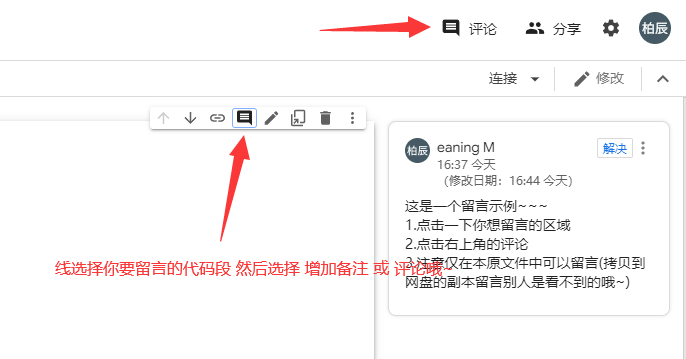

**我的B站：(https://space.bilibili.com/734296)**

###⬇️ 声明和更新日志 ⬇️

Disco Diffusion v5.1 的版权问题及来源声明 这里不做本地化处理！

#### Credits

Original notebook by Katherine Crowson (https://github.com/crowsonkb, https://twitter.com/RiversHaveWings). It uses either OpenAI's 256x256 unconditional ImageNet or Katherine Crowson's fine-tuned 512x512 diffusion model (https://github.com/openai/guided-diffusion), together with CLIP (https://github.com/openai/CLIP) to connect text prompts with images.

Modified by Daniel Russell (https://github.com/russelldc, https://twitter.com/danielrussruss) to include (hopefully) optimal params for quick generations in 15-100 timesteps rather than 1000, as well as more robust augmentations.

Further improvements from Dango233 and nsheppard helped improve the quality of diffusion in general, and especially so for shorter runs like this notebook aims to achieve.

Vark added code to load in multiple Clip models at once, which all prompts are evaluated against, which may greatly improve accuracy.

The latest zoom, pan, rotation, and keyframes features were taken from Chigozie Nri's VQGAN Zoom Notebook (https://github.com/chigozienri, https://twitter.com/chigozienri)

Advanced DangoCutn Cutout method is also from Dango223.

--

Disco:

Somnai (https://twitter.com/Somnai_dreams) added Diffusion Animation techniques, QoL improvements and various implementations of tech and techniques, mostly listed in the changelog below.

3D animation implementation added by Adam Letts (https://twitter.com/gandamu_ml) in collaboration with Somnai.

Turbo feature by Chris Allen (https://twitter.com/zippy731)

#### License

Licensed under the MIT License

Copyright (c) 2021 Katherine Crowson 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

--

MIT License

Copyright (c) 2019 Intel ISL (Intel Intelligent Systems Lab)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

--

Licensed under the MIT License

Copyright (c) 2021 Maxwell Ingham

Copyright (c) 2022 Adam Letts 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

#### 更新日志

In [ ]:
#@title <- View Changelog
skip_for_run_all = True #@param {type: 'boolean'}

if skip_for_run_all == False:
  print(
      '''
  v1 Update: Oct 29th 2021 - Somnai

      QoL improvements added by Somnai (@somnai_dreams), including user friendly UI, settings+prompt saving and improved google drive folder organization.

  v1.1 Update: Nov 13th 2021 - Somnai

      Now includes sizing options, intermediate saves and fixed image prompts and perlin inits. unexposed batch option since it doesn't work

  v2 Update: Nov 22nd 2021 - Somnai

      Initial addition of Katherine Crowson's Secondary Model Method (https://colab.research.google.com/drive/1mpkrhOjoyzPeSWy2r7T8EYRaU7amYOOi#scrollTo=X5gODNAMEUCR)

      Noticed settings were saving with the wrong name so corrected it. Let me know if you preferred the old scheme.

  v3 Update: Dec 24th 2021 - Somnai

      Implemented Dango's advanced cutout method

      Added SLIP models, thanks to NeuralDivergent

      Fixed issue with NaNs resulting in black images, with massive help and testing from @Softology

      Perlin now changes properly within batches (not sure where this perlin_regen code came from originally, but thank you)

  v4 Update: Jan 2021 - Somnai

      Implemented Diffusion Zooming

      Added Chigozie keyframing

      Made a bunch of edits to processes
  
  v4.1 Update: Jan  14th 2021 - Somnai

      Added video input mode

      Added license that somehow went missing

      Added improved prompt keyframing, fixed image_prompts and multiple prompts

      Improved UI

      Significant under the hood cleanup and improvement

      Refined defaults for each mode

      Added latent-diffusion SuperRes for sharpening

      Added resume run mode

  v4.9 Update: Feb 5th 2022 - gandamu / Adam Letts

      Added 3D

      Added brightness corrections to prevent animation from steadily going dark over time

  v4.91 Update: Feb 19th 2022 - gandamu / Adam Letts

      Cleaned up 3D implementation and made associated args accessible via Colab UI elements

  v4.92 Update: Feb 20th 2022 - gandamu / Adam Letts

      Separated transform code

  v5.01 Update: Mar 10th 2022 - gandamu / Adam Letts

      IPython magic commands replaced by Python code

  v5.1 Update: Mar 30th 2022 - zippy / Chris Allen and gandamu / Adam Letts

      Integrated Turbo+Smooth features from Disco Diffusion Turbo -- just the implementation, without its defaults.

      Implemented resume of turbo animations in such a way that it's now possible to resume from different batch folders and batch numbers.

      3D rotation parameter units are now degrees (rather than radians)

      Corrected name collision in sampling_mode (now diffusion_sampling_mode for plms/ddim, and sampling_mode for 3D transform sampling)

      Added video_init_seed_continuity option to make init video animations more continuous

      '''
  )


# 帮助

**Diffusion settings (Defaults are heavily outdated)**
---

This section is outdated as of v2

Setting | Description | Default
--- | --- | ---
**Your vision:**
`text_prompts` | A description of what you'd like the machine to generate. Think of it like writing the caption below your image on a website. | N/A
`image_prompts` | Think of these images more as a description of their contents. | N/A
**Image quality:**
`clip_guidance_scale`  | Controls how much the image should look like the prompt. | 1000
`tv_scale` |  Controls the smoothness of the final output. | 150
`range_scale` |  Controls how far out of range RGB values are allowed to be. | 150
`sat_scale` | Controls how much saturation is allowed. From nshepperd's JAX notebook. | 0
`cutn` | Controls how many crops to take from the image. | 16
`cutn_batches` | Accumulate CLIP gradient from multiple batches of cuts  | 2
**Init settings:**
`init_image` |   URL or local path | None
`init_scale` |  This enhances the effect of the init image, a good value is 1000 | 0
`skip_steps Controls the starting point along the diffusion timesteps | 0
`perlin_init` |  Option to start with random perlin noise | False
`perlin_mode` |  ('gray', 'color') | 'mixed'
**Advanced:**
`skip_augs` |Controls whether to skip torchvision augmentations | False
`randomize_class` |Controls whether the imagenet class is randomly changed each iteration | True
`clip_denoised` |Determines whether CLIP discriminates a noisy or denoised image | False
`clamp_grad` |Experimental: Using adaptive clip grad in the cond_fn | True
`seed`  | Choose a random seed and print it at end of run for reproduction | random_seed
`fuzzy_prompt` | Controls whether to add multiple noisy prompts to the prompt losses | False
`rand_mag` |Controls the magnitude of the random noise | 0.1
`eta` | DDIM hyperparameter | 0.5

..

**Model settings**
---

Setting | Description | Default
--- | --- | ---
**Diffusion:**
`timestep_respacing`  | Modify this value to decrease the number of timesteps. | ddim100
`diffusion_steps` || 1000
**Diffusion:**
`clip_models`  | Models of CLIP to load. Typically the more, the better but they all come at a hefty VRAM cost. | ViT-B/32, ViT-B/16, RN50x4

###⬇️ 声明和更新日志 ⬇️

Disco Diffusion v5.1 的版权问题及来源声明 这里不做本地化处理！

#### Credits

Original notebook by Katherine Crowson (https://github.com/crowsonkb, https://twitter.com/RiversHaveWings). It uses either OpenAI's 256x256 unconditional ImageNet or Katherine Crowson's fine-tuned 512x512 diffusion model (https://github.com/openai/guided-diffusion), together with CLIP (https://github.com/openai/CLIP) to connect text prompts with images.

Modified by Daniel Russell (https://github.com/russelldc, https://twitter.com/danielrussruss) to include (hopefully) optimal params for quick generations in 15-100 timesteps rather than 1000, as well as more robust augmentations.

Further improvements from Dango233 and nsheppard helped improve the quality of diffusion in general, and especially so for shorter runs like this notebook aims to achieve.

Vark added code to load in multiple Clip models at once, which all prompts are evaluated against, which may greatly improve accuracy.

The latest zoom, pan, rotation, and keyframes features were taken from Chigozie Nri's VQGAN Zoom Notebook (https://github.com/chigozienri, https://twitter.com/chigozienri)

Advanced DangoCutn Cutout method is also from Dango223.

--

Disco:

Somnai (https://twitter.com/Somnai_dreams) added Diffusion Animation techniques, QoL improvements and various implementations of tech and techniques, mostly listed in the changelog below.

3D animation implementation added by Adam Letts (https://twitter.com/gandamu_ml) in collaboration with Somnai.

Turbo feature by Chris Allen (https://twitter.com/zippy731)

#### License

Licensed under the MIT License

Copyright (c) 2021 Katherine Crowson 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

--

MIT License

Copyright (c) 2019 Intel ISL (Intel Intelligent Systems Lab)

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

--

Licensed under the MIT License

Copyright (c) 2021 Maxwell Ingham

Copyright (c) 2022 Adam Letts 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

#### Changelog

In [ ]:
#@title <- View Changelog
skip_for_run_all = True #@param {type: 'boolean'}

if skip_for_run_all == False:
  print(
      '''
  v1 Update: Oct 29th 2021 - Somnai

      QoL improvements added by Somnai (@somnai_dreams), including user friendly UI, settings+prompt saving and improved google drive folder organization.

  v1.1 Update: Nov 13th 2021 - Somnai

      Now includes sizing options, intermediate saves and fixed image prompts and perlin inits. unexposed batch option since it doesn't work

  v2 Update: Nov 22nd 2021 - Somnai

      Initial addition of Katherine Crowson's Secondary Model Method (https://colab.research.google.com/drive/1mpkrhOjoyzPeSWy2r7T8EYRaU7amYOOi#scrollTo=X5gODNAMEUCR)

      Noticed settings were saving with the wrong name so corrected it. Let me know if you preferred the old scheme.

  v3 Update: Dec 24th 2021 - Somnai

      Implemented Dango's advanced cutout method

      Added SLIP models, thanks to NeuralDivergent

      Fixed issue with NaNs resulting in black images, with massive help and testing from @Softology

      Perlin now changes properly within batches (not sure where this perlin_regen code came from originally, but thank you)

  v4 Update: Jan 2021 - Somnai

      Implemented Diffusion Zooming

      Added Chigozie keyframing

      Made a bunch of edits to processes
  
  v4.1 Update: Jan  14th 2021 - Somnai

      Added video input mode

      Added license that somehow went missing

      Added improved prompt keyframing, fixed image_prompts and multiple prompts

      Improved UI

      Significant under the hood cleanup and improvement

      Refined defaults for each mode

      Added latent-diffusion SuperRes for sharpening

      Added resume run mode

  v4.9 Update: Feb 5th 2022 - gandamu / Adam Letts

      Added 3D

      Added brightness corrections to prevent animation from steadily going dark over time

  v4.91 Update: Feb 19th 2022 - gandamu / Adam Letts

      Cleaned up 3D implementation and made associated args accessible via Colab UI elements

  v4.92 Update: Feb 20th 2022 - gandamu / Adam Letts

      Separated transform code

  v5.01 Update: Mar 10th 2022 - gandamu / Adam Letts

      IPython magic commands replaced by Python code

  v5.1 Update: Mar 30th 2022 - zippy / Chris Allen and gandamu / Adam Letts

      Integrated Turbo+Smooth features from Disco Diffusion Turbo -- just the implementation, without its defaults.

      Implemented resume of turbo animations in such a way that it's now possible to resume from different batch folders and batch numbers.

      3D rotation parameter units are now degrees (rather than radians)

      Corrected name collision in sampling_mode (now diffusion_sampling_mode for plms/ddim, and sampling_mode for 3D transform sampling)

      Added video_init_seed_continuity option to make init video animations more continuous

      '''
  )


# 0️⃣ 内存设置

这项功能仅对 **Colab+** 以及 **Colab PRO** 是用户有效


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('你的运行时有 {:.1f} 千兆字节的可用内存\n'.format(ram_gb))

if ram_gb < 20:
  print('你不能使用高RAM的运行时.')
else:
  print('你正在使用一个高RAM的运行时!')

# 1️⃣ 预准备设置

在这里我们将设置你的服务器以及连接网盘

下载与安装前置依赖库为后续的AI渲染模型做准备（你无需担心请按照顺序运行即可程序是全自动的）

In [ ]:
#@title 1.1 检查GPU状态
import subprocess
#@markdown 勾选则显示服务器的GPU信息.
simple_nvidia_smi_display = True#@param {type:"boolean"}

#@markdown 如果刷新出的服务器是V8 那么请点击菜单栏中的 代码执行程序-管理会话 断开与当前服务器的连接并重新运行此段代码以便获取新的服务器.

#@markdown 优先推荐视同T4 以及 P100 进行渲染！
if simple_nvidia_smi_display:
  #!nvidia-smi
  nvidiasmi_output = subprocess.run(['nvidia-smi', '-L'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_output)
else:
  #!nvidia-smi -i 0 -e 0
  nvidiasmi_output = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_output)
  nvidiasmi_ecc_note = subprocess.run(['nvidia-smi', '-i', '0', '-e', '0'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(nvidiasmi_ecc_note)

In [ ]:
#@title 1.2 准备好网盘
import subprocess
import sys
import ipykernel

def gitclone(url):
  res = subprocess.run(['git', 'clone', url], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def pipi(modulestr):
  res = subprocess.run(['pip', 'install', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def pipie(modulestr):
  res = subprocess.run(['git', 'install', '-e', modulestr], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

def wget(url, outputdir):
  res = subprocess.run(['wget', url, '-P', f'{outputdir}'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(res)

try:
    from google.colab import drive
    print("Google Colab detected. Using Google Drive.")
    is_colab = True
    #@markdown 如果你连接你的谷歌驱动器，你可以将每次运行的最终图像保存在你的驱动器上.
    google_drive = True #@param {type:"boolean"}
    #@markdown 如果你想把Diffusion模型检查点文件保存到（和/或从）你的Google Drive上加载，请点击这里.
    save_models_to_google_drive = True #@param {type:"boolean"}
except:
    is_colab = False
    google_drive = False
    save_models_to_google_drive = False
    print("Google Colab not detected.")

if is_colab:
    if google_drive is True:
        drive.mount('/content/drive')
        root_path = '/content/drive/MyDrive/AI/Disco_Diffusion'
    else:
        root_path = '/content'
else:
    root_path = '.'

import os
def createPath(filepath):
    os.makedirs(filepath, exist_ok=True)

initDirPath = f'{root_path}/init_images'
createPath(initDirPath)
outDirPath = f'{root_path}/images_out'
createPath(outDirPath)

if is_colab:
    if google_drive and not save_models_to_google_drive or not google_drive:
        model_path = '/content/model'
        createPath(model_path)
    if google_drive and save_models_to_google_drive:
        model_path = f'{root_path}/model'
        createPath(model_path)
else:
    model_path = f'{root_path}/model'
    createPath(model_path)

# libraries = f'{root_path}/libraries'
# createPath(libraries)

In [ ]:
#@title ### 1.3 安装和导入依赖项

#@markdown 无需用户配置按照顺序运行即可.

import pathlib, shutil

if not is_colab:
  # If running locally, there's a good chance your env will need this in order to not crash upon np.matmul() or similar operations.
  os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

PROJECT_DIR = os.path.abspath(os.getcwd())
USE_ADABINS = True

if is_colab:
  if google_drive is not True:
    root_path = f'/content'
    model_path = '/content/models' 
else:
  root_path = f'.'
  model_path = f'{root_path}/model'

model_256_downloaded = False
model_512_downloaded = False
model_secondary_downloaded = False

if is_colab:
  gitclone("https://github.com/openai/CLIP")
  #gitclone("https://github.com/facebookresearch/SLIP.git")
  gitclone("https://github.com/crowsonkb/guided-diffusion")
  gitclone("https://github.com/assafshocher/ResizeRight.git")
  gitclone("https://github.com/MSFTserver/pytorch3d-lite.git")
  pipie("./CLIP")
  pipie("./guided-diffusion")
  multipip_res = subprocess.run(['pip', 'install', 'lpips', 'datetime', 'timm', 'ftfy'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  print(multipip_res)
  subprocess.run(['apt', 'install', 'imagemagick'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  gitclone("https://github.com/isl-org/MiDaS.git")
  gitclone("https://github.com/alembics/disco-diffusion.git")
  pipi("pytorch-lightning")
  pipi("omegaconf")
  pipi("einops")
  # Rename a file to avoid a name conflict..
  try:
    os.rename("MiDaS/utils.py", "MiDaS/midas_utils.py")
    shutil.copyfile("disco-diffusion/disco_xform_utils.py", "disco_xform_utils.py")
  except:
    pass

if not os.path.exists(f'{model_path}'):
  pathlib.Path(model_path).mkdir(parents=True, exist_ok=True)
if not os.path.exists(f'{model_path}/dpt_large-midas-2f21e586.pt'):
  wget("https://github.com/intel-isl/DPT/releases/download/1_0/dpt_large-midas-2f21e586.pt", model_path)

import sys
import torch

# sys.path.append('./SLIP')
sys.path.append('./pytorch3d-lite')
sys.path.append('./ResizeRight')
sys.path.append('./MiDaS')
from dataclasses import dataclass
from functools import partial
import cv2
import pandas as pd
import gc
import io
import math
import timm
from IPython import display
import lpips
from PIL import Image, ImageOps
import requests
from glob import glob
import json
from types import SimpleNamespace
from torch import nn
from torch.nn import functional as F
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from tqdm.notebook import tqdm
sys.path.append('./CLIP')
sys.path.append('./guided-diffusion')
import clip
from resize_right import resize
# from models import SLIP_VITB16, SLIP, SLIP_VITL16
from guided_diffusion.script_util import create_model_and_diffusion, model_and_diffusion_defaults
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import Output
import hashlib

#SuperRes
if is_colab:
  gitclone("https://github.com/CompVis/latent-diffusion.git")
  gitclone("https://github.com/CompVis/taming-transformers")
  pipie("./taming-transformers")
  pipi("ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops wandb")

#SuperRes
import ipywidgets as widgets
import os
sys.path.append(".")
sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming
from torchvision.datasets.utils import download_url

if is_colab:
  os.chdir('/content/latent-diffusion')
else:
  #os.chdir('latent-diffusion')
  sys.path.append('latent-diffusion')
from functools import partial
from ldm.util import instantiate_from_config
from ldm.modules.diffusionmodules.util import make_ddim_sampling_parameters, make_ddim_timesteps, noise_like
# from ldm.models.diffusion.ddim import DDIMSampler
from ldm.util import ismap
if is_colab:
  os.chdir('/content')
  from google.colab import files
else:
  os.chdir(f'{PROJECT_DIR}')
from IPython.display import Image as ipyimg
from numpy import asarray
from einops import rearrange, repeat
import torch, torchvision
import time
from omegaconf import OmegaConf
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# AdaBins stuff
if USE_ADABINS:
  if is_colab:
    gitclone("https://github.com/shariqfarooq123/AdaBins.git")
    if not os.path.exists(f'{model_path}/AdaBins_nyu.pt'):
      wget("https://cloudflare-ipfs.com/ipfs/Qmd2mMnDLWePKmgfS8m6ntAg4nhV5VkUyAydYBp8cWWeB7/AdaBins_nyu.pt", model_path)
    pathlib.Path("pretrained").mkdir(parents=True, exist_ok=True)
    shutil.copyfile(f"{model_path}/AdaBins_nyu.pt", "pretrained/AdaBins_nyu.pt")
  sys.path.append('./AdaBins')
  from infer import InferenceHelper
  MAX_ADABINS_AREA = 500000

import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)
device = DEVICE # At least one of the modules expects this name..

if torch.cuda.get_device_capability(DEVICE) == (8,0): ## A100 fix thanks to Emad
  print('Disabling CUDNN for A100 gpu', file=sys.stderr)
  torch.backends.cudnn.enabled = False

In [ ]:
#@title ### 1.4 定义Midas的功能

#@markdown 无需用户配置按照顺序运行即可.

from midas.dpt_depth import DPTDepthModel
from midas.midas_net import MidasNet
from midas.midas_net_custom import MidasNet_small
from midas.transforms import Resize, NormalizeImage, PrepareForNet

# 初始化MiDaS深度模型.
# 它仍然驻留在VRAM中，可能需要大约2GB的VRAM.
# 你可以为每一帧初始化它（并在每一帧后释放它）以节省VRAM......但初始化它是很慢的.
default_models = {
    "midas_v21_small": f"{model_path}/midas_v21_small-70d6b9c8.pt",
    "midas_v21": f"{model_path}/midas_v21-f6b98070.pt",
    "dpt_large": f"{model_path}/dpt_large-midas-2f21e586.pt",
    "dpt_hybrid": f"{model_path}/dpt_hybrid-midas-501f0c75.pt",
    "dpt_hybrid_nyu": f"{model_path}/dpt_hybrid_nyu-2ce69ec7.pt",}


def init_midas_depth_model(midas_model_type="dpt_large", optimize=True):
    midas_model = None
    net_w = None
    net_h = None
    resize_mode = None
    normalization = None

    print(f"Initializing MiDaS '{midas_model_type}' depth model...")
    # load network
    midas_model_path = default_models[midas_model_type]

    if midas_model_type == "dpt_large": # DPT-Large
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitl16_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode = "minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "dpt_hybrid": #DPT-Hybrid
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitb_rn50_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode="minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "dpt_hybrid_nyu": #DPT-Hybrid-NYU
        midas_model = DPTDepthModel(
            path=midas_model_path,
            backbone="vitb_rn50_384",
            non_negative=True,
        )
        net_w, net_h = 384, 384
        resize_mode="minimal"
        normalization = NormalizeImage(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif midas_model_type == "midas_v21":
        midas_model = MidasNet(midas_model_path, non_negative=True)
        net_w, net_h = 384, 384
        resize_mode="upper_bound"
        normalization = NormalizeImage(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    elif midas_model_type == "midas_v21_small":
        midas_model = MidasNet_small(midas_model_path, features=64, backbone="efficientnet_lite3", exportable=True, non_negative=True, blocks={'expand': True})
        net_w, net_h = 256, 256
        resize_mode="upper_bound"
        normalization = NormalizeImage(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        )
    else:
        print(f"midas_model_type '{midas_model_type}' not implemented")
        assert False

    midas_transform = T.Compose(
        [
            Resize(
                net_w,
                net_h,
                resize_target=None,
                keep_aspect_ratio=True,
                ensure_multiple_of=32,
                resize_method=resize_mode,
                image_interpolation_method=cv2.INTER_CUBIC,
            ),
            normalization,
            PrepareForNet(),
        ]
    )

    midas_model.eval()
    
    if optimize==True:
        if DEVICE == torch.device("cuda"):
            midas_model = midas_model.to(memory_format=torch.channels_last)  
            midas_model = midas_model.half()

    midas_model.to(DEVICE)

    print(f"MiDaS '{midas_model_type}' depth model initialized.")
    return midas_model, midas_transform, net_w, net_h, resize_mode, normalization

In [ ]:
#@title 1.5 确定必要的功能

#@markdown 无需用户配置按照顺序运行即可.

# https://gist.github.com/adefossez/0646dbe9ed4005480a2407c62aac8869

import py3d_tools as p3dT
import disco_xform_utils as dxf

def interp(t):
    return 3 * t**2 - 2 * t ** 3

def perlin(width, height, scale=10, device=None):
    gx, gy = torch.randn(2, width + 1, height + 1, 1, 1, device=device)
    xs = torch.linspace(0, 1, scale + 1)[:-1, None].to(device)
    ys = torch.linspace(0, 1, scale + 1)[None, :-1].to(device)
    wx = 1 - interp(xs)
    wy = 1 - interp(ys)
    dots = 0
    dots += wx * wy * (gx[:-1, :-1] * xs + gy[:-1, :-1] * ys)
    dots += (1 - wx) * wy * (-gx[1:, :-1] * (1 - xs) + gy[1:, :-1] * ys)
    dots += wx * (1 - wy) * (gx[:-1, 1:] * xs - gy[:-1, 1:] * (1 - ys))
    dots += (1 - wx) * (1 - wy) * (-gx[1:, 1:] * (1 - xs) - gy[1:, 1:] * (1 - ys))
    return dots.permute(0, 2, 1, 3).contiguous().view(width * scale, height * scale)

def perlin_ms(octaves, width, height, grayscale, device=device):
    out_array = [0.5] if grayscale else [0.5, 0.5, 0.5]
    # out_array = [0.0] if grayscale else [0.0, 0.0, 0.0]
    for i in range(1 if grayscale else 3):
        scale = 2 ** len(octaves)
        oct_width = width
        oct_height = height
        for oct in octaves:
            p = perlin(oct_width, oct_height, scale, device)
            out_array[i] += p * oct
            scale //= 2
            oct_width *= 2
            oct_height *= 2
    return torch.cat(out_array)

def create_perlin_noise(octaves=[1, 1, 1, 1], width=2, height=2, grayscale=True):
    out = perlin_ms(octaves, width, height, grayscale)
    if grayscale:
        out = TF.resize(size=(side_y, side_x), img=out.unsqueeze(0))
        out = TF.to_pil_image(out.clamp(0, 1)).convert('RGB')
    else:
        out = out.reshape(-1, 3, out.shape[0]//3, out.shape[1])
        out = TF.resize(size=(side_y, side_x), img=out)
        out = TF.to_pil_image(out.clamp(0, 1).squeeze())

    out = ImageOps.autocontrast(out)
    return out

def regen_perlin():
    if perlin_mode == 'color':
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, False)
    elif perlin_mode == 'gray':
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, True)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
    else:
        init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
        init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)

    init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device).unsqueeze(0).mul(2).sub(1)
    del init2
    return init.expand(batch_size, -1, -1, -1)

def fetch(url_or_path):
    if str(url_or_path).startswith('http://') or str(url_or_path).startswith('https://'):
        r = requests.get(url_or_path)
        r.raise_for_status()
        fd = io.BytesIO()
        fd.write(r.content)
        fd.seek(0)
        return fd
    return open(url_or_path, 'rb')

def read_image_workaround(path):
    """OpenCV reads images as BGR, Pillow saves them as RGB. Work around
    this incompatibility to avoid colour inversions."""
    im_tmp = cv2.imread(path)
    return cv2.cvtColor(im_tmp, cv2.COLOR_BGR2RGB)

def parse_prompt(prompt):
    if prompt.startswith('http://') or prompt.startswith('https://'):
        vals = prompt.rsplit(':', 2)
        vals = [vals[0] + ':' + vals[1], *vals[2:]]
    else:
        vals = prompt.rsplit(':', 1)
    vals = vals + ['', '1'][len(vals):]
    return vals[0], float(vals[1])

def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))

def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()

def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]

def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.reshape([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.reshape([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)

class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, skip_augs=False):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.skip_augs = skip_augs
        self.augs = T.Compose([
            T.RandomHorizontalFlip(p=0.5),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomPerspective(distortion_scale=0.4, p=0.7),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            T.RandomGrayscale(p=0.15),
            T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
            # T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        ])

    def forward(self, input):
        input = T.Pad(input.shape[2]//4, fill=0)(input)
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)

        cutouts = []
        for ch in range(self.cutn):
            if ch > self.cutn - self.cutn//4:
                cutout = input.clone()
            else:
                size = int(max_size * torch.zeros(1,).normal_(mean=.8, std=.3).clip(float(self.cut_size/max_size), 1.))
                offsetx = torch.randint(0, abs(sideX - size + 1), ())
                offsety = torch.randint(0, abs(sideY - size + 1), ())
                cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]

            if not self.skip_augs:
                cutout = self.augs(cutout)
            cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))
            del cutout

        cutouts = torch.cat(cutouts, dim=0)
        return cutouts

cutout_debug = False
padargs = {}

class MakeCutoutsDango(nn.Module):
    def __init__(self, cut_size,
                 Overview=4, 
                 InnerCrop = 0, IC_Size_Pow=0.5, IC_Grey_P = 0.2
                 ):
        super().__init__()
        self.cut_size = cut_size
        self.Overview = Overview
        self.InnerCrop = InnerCrop
        self.IC_Size_Pow = IC_Size_Pow
        self.IC_Grey_P = IC_Grey_P
        if args.animation_mode == 'None':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.5),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=10, translate=(0.05, 0.05),  interpolation = T.InterpolationMode.BILINEAR),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.1),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
          ])
        elif args.animation_mode == 'Video Input':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.5),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=15, translate=(0.1, 0.1)),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomPerspective(distortion_scale=0.4, p=0.7),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.15),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              # T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
          ])
        elif  args.animation_mode == '2D' or args.animation_mode == '3D':
          self.augs = T.Compose([
              T.RandomHorizontalFlip(p=0.4),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomAffine(degrees=10, translate=(0.05, 0.05),  interpolation = T.InterpolationMode.BILINEAR),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.RandomGrayscale(p=0.1),
              T.Lambda(lambda x: x + torch.randn_like(x) * 0.01),
              T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.3),
          ])
          

    def forward(self, input):
        cutouts = []
        gray = T.Grayscale(3)
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        l_size = max(sideX, sideY)
        output_shape = [1,3,self.cut_size,self.cut_size] 
        output_shape_2 = [1,3,self.cut_size+2,self.cut_size+2]
        pad_input = F.pad(input,((sideY-max_size)//2,(sideY-max_size)//2,(sideX-max_size)//2,(sideX-max_size)//2), **padargs)
        cutout = resize(pad_input, out_shape=output_shape)

        if self.Overview>0:
            if self.Overview<=4:
                if self.Overview>=1:
                    cutouts.append(cutout)
                if self.Overview>=2:
                    cutouts.append(gray(cutout))
                if self.Overview>=3:
                    cutouts.append(TF.hflip(cutout))
                if self.Overview==4:
                    cutouts.append(gray(TF.hflip(cutout)))
            else:
                cutout = resize(pad_input, out_shape=output_shape)
                for _ in range(self.Overview):
                    cutouts.append(cutout)

            if cutout_debug:
                if is_colab:
                    TF.to_pil_image(cutouts[0].clamp(0, 1).squeeze(0)).save("/content/cutout_overview0.jpg",quality=99)
                else:
                    TF.to_pil_image(cutouts[0].clamp(0, 1).squeeze(0)).save("cutout_overview0.jpg",quality=99)

                              
        if self.InnerCrop >0:
            for i in range(self.InnerCrop):
                size = int(torch.rand([])**self.IC_Size_Pow * (max_size - min_size) + min_size)
                offsetx = torch.randint(0, sideX - size + 1, ())
                offsety = torch.randint(0, sideY - size + 1, ())
                cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
                if i <= int(self.IC_Grey_P * self.InnerCrop):
                    cutout = gray(cutout)
                cutout = resize(cutout, out_shape=output_shape)
                cutouts.append(cutout)
            if cutout_debug:
                if is_colab:
                    TF.to_pil_image(cutouts[-1].clamp(0, 1).squeeze(0)).save("/content/cutout_InnerCrop.jpg",quality=99)
                else:
                    TF.to_pil_image(cutouts[-1].clamp(0, 1).squeeze(0)).save("cutout_InnerCrop.jpg",quality=99)
        cutouts = torch.cat(cutouts)
        if skip_augs is not True: cutouts=self.augs(cutouts)
        return cutouts

def spherical_dist_loss(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return (x - y).norm(dim=-1).div(2).arcsin().pow(2).mul(2)     

def tv_loss(input):
    """L2 total variation loss, as in Mahendran et al."""
    input = F.pad(input, (0, 1, 0, 1), 'replicate')
    x_diff = input[..., :-1, 1:] - input[..., :-1, :-1]
    y_diff = input[..., 1:, :-1] - input[..., :-1, :-1]
    return (x_diff**2 + y_diff**2).mean([1, 2, 3])


def range_loss(input):
    return (input - input.clamp(-1, 1)).pow(2).mean([1, 2, 3])

stop_on_next_loop = False  # Make sure GPU memory doesn't get corrupted from cancelling the run mid-way through, allow a full frame to complete

def do_3d_step(img_filepath, frame_num, midas_model, midas_transform):
  if args.key_frames:
    translation_x = args.translation_x_series[frame_num]
    translation_y = args.translation_y_series[frame_num]
    translation_z = args.translation_z_series[frame_num]
    rotation_3d_x = args.rotation_3d_x_series[frame_num]
    rotation_3d_y = args.rotation_3d_y_series[frame_num]
    rotation_3d_z = args.rotation_3d_z_series[frame_num]
    print(
        f'translation_x: {translation_x}',
        f'translation_y: {translation_y}',
        f'translation_z: {translation_z}',
        f'rotation_3d_x: {rotation_3d_x}',
        f'rotation_3d_y: {rotation_3d_y}',
        f'rotation_3d_z: {rotation_3d_z}',
    )

  trans_scale = 1.0/200.0
  translate_xyz = [-translation_x*trans_scale, translation_y*trans_scale, -translation_z*trans_scale]
  rotate_xyz_degrees = [rotation_3d_x, rotation_3d_y, rotation_3d_z]
  print('translation:',translate_xyz)
  print('rotation:',rotate_xyz_degrees)
  rotate_xyz = [math.radians(rotate_xyz_degrees[0]), math.radians(rotate_xyz_degrees[1]), math.radians(rotate_xyz_degrees[2])]
  rot_mat = p3dT.euler_angles_to_matrix(torch.tensor(rotate_xyz, device=device), "XYZ").unsqueeze(0)
  print("rot_mat: " + str(rot_mat))
  next_step_pil = dxf.transform_image_3d(img_filepath, midas_model, midas_transform, DEVICE,
                                          rot_mat, translate_xyz, args.near_plane, args.far_plane,
                                          args.fov, padding_mode=args.padding_mode,
                                          sampling_mode=args.sampling_mode, midas_weight=args.midas_weight)
  return next_step_pil

def do_run():
  seed = args.seed
  print(range(args.start_frame, args.max_frames))

  if (args.animation_mode == "3D") and (args.midas_weight > 0.0):
      midas_model, midas_transform, midas_net_w, midas_net_h, midas_resize_mode, midas_normalization = init_midas_depth_model(args.midas_depth_model)
  for frame_num in range(args.start_frame, args.max_frames):
      if stop_on_next_loop:
        break
      
      display.clear_output(wait=True)

      # Print Frame progress if animation mode is on
      if args.animation_mode != "None":
        batchBar = tqdm(range(args.max_frames), desc ="Frames")
        batchBar.n = frame_num
        batchBar.refresh()

      
      # Inits if not video frames
      if args.animation_mode != "Video Input":
        if args.init_image == '':
          init_image = None
        else:
          init_image = args.init_image
        init_scale = args.init_scale
        skip_steps = args.skip_steps

      if args.animation_mode == "2D":
        if args.key_frames:
          angle = args.angle_series[frame_num]
          zoom = args.zoom_series[frame_num]
          translation_x = args.translation_x_series[frame_num]
          translation_y = args.translation_y_series[frame_num]
          print(
              f'angle: {angle}',
              f'zoom: {zoom}',
              f'translation_x: {translation_x}',
              f'translation_y: {translation_y}',
          )
        
        if frame_num > 0:
          seed += 1
          if resume_run and frame_num == start_frame:
            img_0 = cv2.imread(batchFolder+f"/{batch_name}({batchNum})_{start_frame-1:04}.png")
          else:
            img_0 = cv2.imread('prevFrame.png')
          center = (1*img_0.shape[1]//2, 1*img_0.shape[0]//2)
          trans_mat = np.float32(
              [[1, 0, translation_x],
              [0, 1, translation_y]]
          )
          rot_mat = cv2.getRotationMatrix2D( center, angle, zoom )
          trans_mat = np.vstack([trans_mat, [0,0,1]])
          rot_mat = np.vstack([rot_mat, [0,0,1]])
          transformation_matrix = np.matmul(rot_mat, trans_mat)
          img_0 = cv2.warpPerspective(
              img_0,
              transformation_matrix,
              (img_0.shape[1], img_0.shape[0]),
              borderMode=cv2.BORDER_WRAP
          )

          cv2.imwrite('prevFrameScaled.png', img_0)
          init_image = 'prevFrameScaled.png'
          init_scale = args.frames_scale
          skip_steps = args.calc_frames_skip_steps

      if args.animation_mode == "3D":
        if frame_num == 0:
          pass
        else:
          seed += 1    
          if resume_run and frame_num == start_frame:
            img_filepath = batchFolder+f"/{batch_name}({batchNum})_{start_frame-1:04}.png"
            if turbo_mode and frame_num > turbo_preroll:
              shutil.copyfile(img_filepath, 'oldFrameScaled.png')
          else:
            img_filepath = '/content/prevFrame.png' if is_colab else 'prevFrame.png'

          next_step_pil = do_3d_step(img_filepath, frame_num, midas_model, midas_transform)
          next_step_pil.save('prevFrameScaled.png')

          ### Turbo mode - skip some diffusions, use 3d morph for clarity and to save time
          if turbo_mode:
            if frame_num == turbo_preroll: #start tracking oldframe
              next_step_pil.save('oldFrameScaled.png')#stash for later blending          
            elif frame_num > turbo_preroll:
              #set up 2 warped image sequences, old & new, to blend toward new diff image
              old_frame = do_3d_step('oldFrameScaled.png', frame_num, midas_model, midas_transform)
              old_frame.save('oldFrameScaled.png')
              if frame_num % int(turbo_steps) != 0: 
                print('turbo skip this frame: skipping clip diffusion steps')
                filename = f'{args.batch_name}({args.batchNum})_{frame_num:04}.png'
                blend_factor = ((frame_num % int(turbo_steps))+1)/int(turbo_steps)
                print('turbo skip this frame: skipping clip diffusion steps and saving blended frame')
                newWarpedImg = cv2.imread('prevFrameScaled.png')#this is already updated..
                oldWarpedImg = cv2.imread('oldFrameScaled.png')
                blendedImage = cv2.addWeighted(newWarpedImg, blend_factor, oldWarpedImg,1-blend_factor, 0.0)
                cv2.imwrite(f'{batchFolder}/{filename}',blendedImage)
                next_step_pil.save(f'{img_filepath}') # save it also as prev_frame to feed next iteration
                continue
              else:
                #if not a skip frame, will run diffusion and need to blend.
                oldWarpedImg = cv2.imread('prevFrameScaled.png')
                cv2.imwrite(f'oldFrameScaled.png',oldWarpedImg)#swap in for blending later 
                print('clip/diff this frame - generate clip diff image')

          init_image = 'prevFrameScaled.png'
          init_scale = args.frames_scale
          skip_steps = args.calc_frames_skip_steps

      if  args.animation_mode == "Video Input":
        if not video_init_seed_continuity:
          seed += 1
        init_image = f'{videoFramesFolder}/{frame_num+1:04}.jpg'
        init_scale = args.frames_scale
        skip_steps = args.calc_frames_skip_steps

      loss_values = []
  
      if seed is not None:
          np.random.seed(seed)
          random.seed(seed)
          torch.manual_seed(seed)
          torch.cuda.manual_seed_all(seed)
          torch.backends.cudnn.deterministic = True
  
      target_embeds, weights = [], []
      
      if args.prompts_series is not None and frame_num >= len(args.prompts_series):
        frame_prompt = args.prompts_series[-1]
      elif args.prompts_series is not None:
        frame_prompt = args.prompts_series[frame_num]
      else:
        frame_prompt = []
      
      print(args.image_prompts_series)
      if args.image_prompts_series is not None and frame_num >= len(args.image_prompts_series):
        image_prompt = args.image_prompts_series[-1]
      elif args.image_prompts_series is not None:
        image_prompt = args.image_prompts_series[frame_num]
      else:
        image_prompt = []

      print(f'Frame {frame_num} Prompt: {frame_prompt}')

      model_stats = []
      for clip_model in clip_models:
            cutn = 16
            model_stat = {"clip_model":None,"target_embeds":[],"make_cutouts":None,"weights":[]}
            model_stat["clip_model"] = clip_model
            
            
            for prompt in frame_prompt:
                txt, weight = parse_prompt(prompt)
                txt = clip_model.encode_text(clip.tokenize(prompt).to(device)).float()
                
                if args.fuzzy_prompt:
                    for i in range(25):
                        model_stat["target_embeds"].append((txt + torch.randn(txt.shape).cuda() * args.rand_mag).clamp(0,1))
                        model_stat["weights"].append(weight)
                else:
                    model_stat["target_embeds"].append(txt)
                    model_stat["weights"].append(weight)
        
            if image_prompt:
              model_stat["make_cutouts"] = MakeCutouts(clip_model.visual.input_resolution, cutn, skip_augs=skip_augs) 
              for prompt in image_prompt:
                  path, weight = parse_prompt(prompt)
                  img = Image.open(fetch(path)).convert('RGB')
                  img = TF.resize(img, min(side_x, side_y, *img.size), T.InterpolationMode.LANCZOS)
                  batch = model_stat["make_cutouts"](TF.to_tensor(img).to(device).unsqueeze(0).mul(2).sub(1))
                  embed = clip_model.encode_image(normalize(batch)).float()
                  if fuzzy_prompt:
                      for i in range(25):
                          model_stat["target_embeds"].append((embed + torch.randn(embed.shape).cuda() * rand_mag).clamp(0,1))
                          weights.extend([weight / cutn] * cutn)
                  else:
                      model_stat["target_embeds"].append(embed)
                      model_stat["weights"].extend([weight / cutn] * cutn)
        
            model_stat["target_embeds"] = torch.cat(model_stat["target_embeds"])
            model_stat["weights"] = torch.tensor(model_stat["weights"], device=device)
            if model_stat["weights"].sum().abs() < 1e-3:
                raise RuntimeError('The weights must not sum to 0.')
            model_stat["weights"] /= model_stat["weights"].sum().abs()
            model_stats.append(model_stat)
  
      init = None
      if init_image is not None:
          init = Image.open(fetch(init_image)).convert('RGB')
          init = init.resize((args.side_x, args.side_y), Image.LANCZOS)
          init = TF.to_tensor(init).to(device).unsqueeze(0).mul(2).sub(1)
      
      if args.perlin_init:
          if args.perlin_mode == 'color':
              init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
              init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, False)
          elif args.perlin_mode == 'gray':
            init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, True)
            init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
          else:
            init = create_perlin_noise([1.5**-i*0.5 for i in range(12)], 1, 1, False)
            init2 = create_perlin_noise([1.5**-i*0.5 for i in range(8)], 4, 4, True)
          # init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device)
          init = TF.to_tensor(init).add(TF.to_tensor(init2)).div(2).to(device).unsqueeze(0).mul(2).sub(1)
          del init2
  
      cur_t = None
  
      def cond_fn(x, t, y=None):
          with torch.enable_grad():
              x_is_NaN = False
              x = x.detach().requires_grad_()
              n = x.shape[0]
              if use_secondary_model is True:
                alpha = torch.tensor(diffusion.sqrt_alphas_cumprod[cur_t], device=device, dtype=torch.float32)
                sigma = torch.tensor(diffusion.sqrt_one_minus_alphas_cumprod[cur_t], device=device, dtype=torch.float32)
                cosine_t = alpha_sigma_to_t(alpha, sigma)
                out = secondary_model(x, cosine_t[None].repeat([n])).pred
                fac = diffusion.sqrt_one_minus_alphas_cumprod[cur_t]
                x_in = out * fac + x * (1 - fac)
                x_in_grad = torch.zeros_like(x_in)
              else:
                my_t = torch.ones([n], device=device, dtype=torch.long) * cur_t
                out = diffusion.p_mean_variance(model, x, my_t, clip_denoised=False, model_kwargs={'y': y})
                fac = diffusion.sqrt_one_minus_alphas_cumprod[cur_t]
                x_in = out['pred_xstart'] * fac + x * (1 - fac)
                x_in_grad = torch.zeros_like(x_in)
              for model_stat in model_stats:
                for i in range(args.cutn_batches):
                    t_int = int(t.item())+1 #errors on last step without +1, need to find source
                    #when using SLIP Base model the dimensions need to be hard coded to avoid AttributeError: 'VisionTransformer' object has no attribute 'input_resolution'
                    try:
                        input_resolution=model_stat["clip_model"].visual.input_resolution
                    except:
                        input_resolution=224

                    cuts = MakeCutoutsDango(input_resolution,
                            Overview= args.cut_overview[1000-t_int], 
                            InnerCrop = args.cut_innercut[1000-t_int], IC_Size_Pow=args.cut_ic_pow, IC_Grey_P = args.cut_icgray_p[1000-t_int]
                            )
                    clip_in = normalize(cuts(x_in.add(1).div(2)))
                    image_embeds = model_stat["clip_model"].encode_image(clip_in).float()
                    dists = spherical_dist_loss(image_embeds.unsqueeze(1), model_stat["target_embeds"].unsqueeze(0))
                    dists = dists.view([args.cut_overview[1000-t_int]+args.cut_innercut[1000-t_int], n, -1])
                    losses = dists.mul(model_stat["weights"]).sum(2).mean(0)
                    loss_values.append(losses.sum().item()) # log loss, probably shouldn't do per cutn_batch
                    x_in_grad += torch.autograd.grad(losses.sum() * clip_guidance_scale, x_in)[0] / cutn_batches
              tv_losses = tv_loss(x_in)
              if use_secondary_model is True:
                range_losses = range_loss(out)
              else:
                range_losses = range_loss(out['pred_xstart'])
              sat_losses = torch.abs(x_in - x_in.clamp(min=-1,max=1)).mean()
              loss = tv_losses.sum() * tv_scale + range_losses.sum() * range_scale + sat_losses.sum() * sat_scale
              if init is not None and args.init_scale:
                  init_losses = lpips_model(x_in, init)
                  loss = loss + init_losses.sum() * args.init_scale
              x_in_grad += torch.autograd.grad(loss, x_in)[0]
              if torch.isnan(x_in_grad).any()==False:
                  grad = -torch.autograd.grad(x_in, x, x_in_grad)[0]
              else:
                # print("NaN'd")
                x_is_NaN = True
                grad = torch.zeros_like(x)
          if args.clamp_grad and x_is_NaN == False:
              magnitude = grad.square().mean().sqrt()
              return grad * magnitude.clamp(max=args.clamp_max) / magnitude  #min=-0.02, min=-clamp_max, 
          return grad
  
      if args.diffusion_sampling_mode == 'ddim':
          sample_fn = diffusion.ddim_sample_loop_progressive
      else:
          sample_fn = diffusion.plms_sample_loop_progressive


      image_display = Output()
      for i in range(args.n_batches):
          if args.animation_mode == 'None':
            display.clear_output(wait=True)
            batchBar = tqdm(range(args.n_batches), desc ="Batches")
            batchBar.n = i
            batchBar.refresh()
          print('')
          display.display(image_display)
          gc.collect()
          torch.cuda.empty_cache()
          cur_t = diffusion.num_timesteps - skip_steps - 1
          total_steps = cur_t

          if perlin_init:
              init = regen_perlin()

          if args.diffusion_sampling_mode == 'ddim':
              samples = sample_fn(
                  model,
                  (batch_size, 3, args.side_y, args.side_x),
                  clip_denoised=clip_denoised,
                  model_kwargs={},
                  cond_fn=cond_fn,
                  progress=True,
                  skip_timesteps=skip_steps,
                  init_image=init,
                  randomize_class=randomize_class,
                  eta=eta,
              )
          else:
              samples = sample_fn(
                  model,
                  (batch_size, 3, args.side_y, args.side_x),
                  clip_denoised=clip_denoised,
                  model_kwargs={},
                  cond_fn=cond_fn,
                  progress=True,
                  skip_timesteps=skip_steps,
                  init_image=init,
                  randomize_class=randomize_class,
                  order=2,
              )
          
          
          # with run_display:
          # display.clear_output(wait=True)
          imgToSharpen = None
          for j, sample in enumerate(samples):    
            cur_t -= 1
            intermediateStep = False
            if args.steps_per_checkpoint is not None:
                if j % steps_per_checkpoint == 0 and j > 0:
                  intermediateStep = True
            elif j in args.intermediate_saves:
              intermediateStep = True
            with image_display:
              if j % args.display_rate == 0 or cur_t == -1 or intermediateStep == True:
                  for k, image in enumerate(sample['pred_xstart']):
                      # tqdm.write(f'Batch {i}, step {j}, output {k}:')
                      current_time = datetime.now().strftime('%y%m%d-%H%M%S_%f')
                      percent = math.ceil(j/total_steps*100)
                      if args.n_batches > 0:
                        #if intermediates are saved to the subfolder, don't append a step or percentage to the name
                        if cur_t == -1 and args.intermediates_in_subfolder is True:
                          save_num = f'{frame_num:04}' if animation_mode != "None" else i
                          filename = f'{args.batch_name}({args.batchNum})_{save_num}.png'
                        else:
                          #If we're working with percentages, append it
                          if args.steps_per_checkpoint is not None:
                            filename = f'{args.batch_name}({args.batchNum})_{i:04}-{percent:02}%.png'
                          # Or else, iIf we're working with specific steps, append those
                          else:
                            filename = f'{args.batch_name}({args.batchNum})_{i:04}-{j:03}.png'
                      image = TF.to_pil_image(image.add(1).div(2).clamp(0, 1))
                      if j % args.display_rate == 0 or cur_t == -1:
                        image.save('progress.png')
                        display.clear_output(wait=True)
                        display.display(display.Image('progress.png'))
                      if args.steps_per_checkpoint is not None:
                        if j % args.steps_per_checkpoint == 0 and j > 0:
                          if args.intermediates_in_subfolder is True:
                            image.save(f'{partialFolder}/{filename}')
                          else:
                            image.save(f'{batchFolder}/{filename}')
                      else:
                        if j in args.intermediate_saves:
                          if args.intermediates_in_subfolder is True:
                            image.save(f'{partialFolder}/{filename}')
                          else:
                            image.save(f'{batchFolder}/{filename}')
                      if cur_t == -1:
                        if frame_num == 0:
                          save_settings()
                        if args.animation_mode != "None":
                          image.save('prevFrame.png')
                        if args.sharpen_preset != "Off" and animation_mode == "None":
                          imgToSharpen = image
                          if args.keep_unsharp is True:
                            image.save(f'{unsharpenFolder}/{filename}')
                        else:
                          image.save(f'{batchFolder}/{filename}')
                          if args.animation_mode == "3D":
                            # If turbo, save a blended image
                            if turbo_mode:
                              # Mix new image with prevFrameScaled
                              blend_factor = (1)/int(turbo_steps)
                              newFrame = cv2.imread('prevFrame.png') # This is already updated..
                              prev_frame_warped = cv2.imread('prevFrameScaled.png')
                              blendedImage = cv2.addWeighted(newFrame, blend_factor, prev_frame_warped, (1-blend_factor), 0.0)
                              cv2.imwrite(f'{batchFolder}/{filename}',blendedImage)
                            else:
                              image.save(f'{batchFolder}/{filename}')
                        # if frame_num != args.max_frames-1:
                        #   display.clear_output()

          with image_display:   
            if args.sharpen_preset != "Off" and animation_mode == "None":
              print('Starting Diffusion Sharpening...')
              do_superres(imgToSharpen, f'{batchFolder}/{filename}')
              display.clear_output()
          
          plt.plot(np.array(loss_values), 'r')

def save_settings():
  setting_list = {
    'text_prompts': text_prompts,
    'image_prompts': image_prompts,
    'clip_guidance_scale': clip_guidance_scale,
    'tv_scale': tv_scale,
    'range_scale': range_scale,
    'sat_scale': sat_scale,
    # 'cutn': cutn,
    'cutn_batches': cutn_batches,
    'max_frames': max_frames,
    'interp_spline': interp_spline,
    # 'rotation_per_frame': rotation_per_frame,
    'init_image': init_image,
    'init_scale': init_scale,
    'skip_steps': skip_steps,
    # 'zoom_per_frame': zoom_per_frame,
    'frames_scale': frames_scale,
    'frames_skip_steps': frames_skip_steps,
    'perlin_init': perlin_init,
    'perlin_mode': perlin_mode,
    'skip_augs': skip_augs,
    'randomize_class': randomize_class,
    'clip_denoised': clip_denoised,
    'clamp_grad': clamp_grad,
    'clamp_max': clamp_max,
    'seed': seed,
    'fuzzy_prompt': fuzzy_prompt,
    'rand_mag': rand_mag,
    'eta': eta,
    'width': width_height[0],
    'height': width_height[1],
    'diffusion_model': diffusion_model,
    'use_secondary_model': use_secondary_model,
    'steps': steps,
    'diffusion_steps': diffusion_steps,
    'diffusion_sampling_mode': diffusion_sampling_mode,
    'ViTB32': ViTB32,
    'ViTB16': ViTB16,
    'ViTL14': ViTL14,
    'RN101': RN101,
    'RN50': RN50,
    'RN50x4': RN50x4,
    'RN50x16': RN50x16,
    'RN50x64': RN50x64,
    'cut_overview': str(cut_overview),
    'cut_innercut': str(cut_innercut),
    'cut_ic_pow': cut_ic_pow,
    'cut_icgray_p': str(cut_icgray_p),
    'key_frames': key_frames,
    'max_frames': max_frames,
    'angle': angle,
    'zoom': zoom,
    'translation_x': translation_x,
    'translation_y': translation_y,
    'translation_z': translation_z,
    'rotation_3d_x': rotation_3d_x,
    'rotation_3d_y': rotation_3d_y,
    'rotation_3d_z': rotation_3d_z,
    'midas_depth_model': midas_depth_model,
    'midas_weight': midas_weight,
    'near_plane': near_plane,
    'far_plane': far_plane,
    'fov': fov,
    'padding_mode': padding_mode,
    'sampling_mode': sampling_mode,
    'video_init_path':video_init_path,
    'extract_nth_frame':extract_nth_frame,
    'video_init_seed_continuity': video_init_seed_continuity,
    'turbo_mode':turbo_mode,
    'turbo_steps':turbo_steps,
    'turbo_preroll':turbo_preroll,
  }
  # print('Settings:', setting_list)
  with open(f"{batchFolder}/{batch_name}({batchNum})_settings.txt", "w+") as f:   #save settings
    json.dump(setting_list, f, ensure_ascii=False, indent=4)

In [ ]:
#@title 1.6 定义二次扩散模型

#@markdown 无需用户配置按照顺序运行即可.

def append_dims(x, n):
    return x[(Ellipsis, *(None,) * (n - x.ndim))]


def expand_to_planes(x, shape):
    return append_dims(x, len(shape)).repeat([1, 1, *shape[2:]])


def alpha_sigma_to_t(alpha, sigma):
    return torch.atan2(sigma, alpha) * 2 / math.pi


def t_to_alpha_sigma(t):
    return torch.cos(t * math.pi / 2), torch.sin(t * math.pi / 2)


@dataclass
class DiffusionOutput:
    v: torch.Tensor
    pred: torch.Tensor
    eps: torch.Tensor


class ConvBlock(nn.Sequential):
    def __init__(self, c_in, c_out):
        super().__init__(
            nn.Conv2d(c_in, c_out, 3, padding=1),
            nn.ReLU(inplace=True),
        )


class SkipBlock(nn.Module):
    def __init__(self, main, skip=None):
        super().__init__()
        self.main = nn.Sequential(*main)
        self.skip = skip if skip else nn.Identity()

    def forward(self, input):
        return torch.cat([self.main(input), self.skip(input)], dim=1)


class FourierFeatures(nn.Module):
    def __init__(self, in_features, out_features, std=1.):
        super().__init__()
        assert out_features % 2 == 0
        self.weight = nn.Parameter(torch.randn([out_features // 2, in_features]) * std)

    def forward(self, input):
        f = 2 * math.pi * input @ self.weight.T
        return torch.cat([f.cos(), f.sin()], dim=-1)


class SecondaryDiffusionImageNet(nn.Module):
    def __init__(self):
        super().__init__()
        c = 64  # The base channel count

        self.timestep_embed = FourierFeatures(1, 16)

        self.net = nn.Sequential(
            ConvBlock(3 + 16, c),
            ConvBlock(c, c),
            SkipBlock([
                nn.AvgPool2d(2),
                ConvBlock(c, c * 2),
                ConvBlock(c * 2, c * 2),
                SkipBlock([
                    nn.AvgPool2d(2),
                    ConvBlock(c * 2, c * 4),
                    ConvBlock(c * 4, c * 4),
                    SkipBlock([
                        nn.AvgPool2d(2),
                        ConvBlock(c * 4, c * 8),
                        ConvBlock(c * 8, c * 4),
                        nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
                    ]),
                    ConvBlock(c * 8, c * 4),
                    ConvBlock(c * 4, c * 2),
                    nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
                ]),
                ConvBlock(c * 4, c * 2),
                ConvBlock(c * 2, c),
                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False),
            ]),
            ConvBlock(c * 2, c),
            nn.Conv2d(c, 3, 3, padding=1),
        )

    def forward(self, input, t):
        timestep_embed = expand_to_planes(self.timestep_embed(t[:, None]), input.shape)
        v = self.net(torch.cat([input, timestep_embed], dim=1))
        alphas, sigmas = map(partial(append_dims, n=v.ndim), t_to_alpha_sigma(t))
        pred = input * alphas - v * sigmas
        eps = input * sigmas + v * alphas
        return DiffusionOutput(v, pred, eps)


class SecondaryDiffusionImageNet2(nn.Module):
    def __init__(self):
        super().__init__()
        c = 64  # The base channel count
        cs = [c, c * 2, c * 2, c * 4, c * 4, c * 8]

        self.timestep_embed = FourierFeatures(1, 16)
        self.down = nn.AvgPool2d(2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)

        self.net = nn.Sequential(
            ConvBlock(3 + 16, cs[0]),
            ConvBlock(cs[0], cs[0]),
            SkipBlock([
                self.down,
                ConvBlock(cs[0], cs[1]),
                ConvBlock(cs[1], cs[1]),
                SkipBlock([
                    self.down,
                    ConvBlock(cs[1], cs[2]),
                    ConvBlock(cs[2], cs[2]),
                    SkipBlock([
                        self.down,
                        ConvBlock(cs[2], cs[3]),
                        ConvBlock(cs[3], cs[3]),
                        SkipBlock([
                            self.down,
                            ConvBlock(cs[3], cs[4]),
                            ConvBlock(cs[4], cs[4]),
                            SkipBlock([
                                self.down,
                                ConvBlock(cs[4], cs[5]),
                                ConvBlock(cs[5], cs[5]),
                                ConvBlock(cs[5], cs[5]),
                                ConvBlock(cs[5], cs[4]),
                                self.up,
                            ]),
                            ConvBlock(cs[4] * 2, cs[4]),
                            ConvBlock(cs[4], cs[3]),
                            self.up,
                        ]),
                        ConvBlock(cs[3] * 2, cs[3]),
                        ConvBlock(cs[3], cs[2]),
                        self.up,
                    ]),
                    ConvBlock(cs[2] * 2, cs[2]),
                    ConvBlock(cs[2], cs[1]),
                    self.up,
                ]),
                ConvBlock(cs[1] * 2, cs[1]),
                ConvBlock(cs[1], cs[0]),
                self.up,
            ]),
            ConvBlock(cs[0] * 2, cs[0]),
            nn.Conv2d(cs[0], 3, 3, padding=1),
        )

    def forward(self, input, t):
        timestep_embed = expand_to_planes(self.timestep_embed(t[:, None]), input.shape)
        v = self.net(torch.cat([input, timestep_embed], dim=1))
        alphas, sigmas = map(partial(append_dims, n=v.ndim), t_to_alpha_sigma(t))
        pred = input * alphas - v * sigmas
        eps = input * sigmas + v * alphas
        return DiffusionOutput(v, pred, eps)

In [ ]:
#@title 1.7 超分辨率定义

#@markdown 无需用户配置按照顺序运行即可.
class DDIMSampler(object):
    def __init__(self, model, schedule="linear", **kwargs):
        super().__init__()
        self.model = model
        self.ddpm_num_timesteps = model.num_timesteps
        self.schedule = schedule

    def register_buffer(self, name, attr):
        if type(attr) == torch.Tensor:
            if attr.device != torch.device("cuda"):
                attr = attr.to(torch.device("cuda"))
        setattr(self, name, attr)

    def make_schedule(self, ddim_num_steps, ddim_discretize="uniform", ddim_eta=0., verbose=True):
        self.ddim_timesteps = make_ddim_timesteps(ddim_discr_method=ddim_discretize, num_ddim_timesteps=ddim_num_steps,
                                                  num_ddpm_timesteps=self.ddpm_num_timesteps,verbose=verbose)
        alphas_cumprod = self.model.alphas_cumprod
        assert alphas_cumprod.shape[0] == self.ddpm_num_timesteps, 'alphas have to be defined for each timestep'
        to_torch = lambda x: x.clone().detach().to(torch.float32).to(self.model.device)

        self.register_buffer('betas', to_torch(self.model.betas))
        self.register_buffer('alphas_cumprod', to_torch(alphas_cumprod))
        self.register_buffer('alphas_cumprod_prev', to_torch(self.model.alphas_cumprod_prev))

        # calculations for diffusion q(x_t | x_{t-1}) and others
        self.register_buffer('sqrt_alphas_cumprod', to_torch(np.sqrt(alphas_cumprod.cpu())))
        self.register_buffer('sqrt_one_minus_alphas_cumprod', to_torch(np.sqrt(1. - alphas_cumprod.cpu())))
        self.register_buffer('log_one_minus_alphas_cumprod', to_torch(np.log(1. - alphas_cumprod.cpu())))
        self.register_buffer('sqrt_recip_alphas_cumprod', to_torch(np.sqrt(1. / alphas_cumprod.cpu())))
        self.register_buffer('sqrt_recipm1_alphas_cumprod', to_torch(np.sqrt(1. / alphas_cumprod.cpu() - 1)))

        # ddim sampling parameters
        ddim_sigmas, ddim_alphas, ddim_alphas_prev = make_ddim_sampling_parameters(alphacums=alphas_cumprod.cpu(),
                                                                                   ddim_timesteps=self.ddim_timesteps,
                                                                                   eta=ddim_eta,verbose=verbose)
        self.register_buffer('ddim_sigmas', ddim_sigmas)
        self.register_buffer('ddim_alphas', ddim_alphas)
        self.register_buffer('ddim_alphas_prev', ddim_alphas_prev)
        self.register_buffer('ddim_sqrt_one_minus_alphas', np.sqrt(1. - ddim_alphas))
        sigmas_for_original_sampling_steps = ddim_eta * torch.sqrt(
            (1 - self.alphas_cumprod_prev) / (1 - self.alphas_cumprod) * (
                        1 - self.alphas_cumprod / self.alphas_cumprod_prev))
        self.register_buffer('ddim_sigmas_for_original_num_steps', sigmas_for_original_sampling_steps)

    @torch.no_grad()
    def sample(self,
               S,
               batch_size,
               shape,
               conditioning=None,
               callback=None,
               normals_sequence=None,
               img_callback=None,
               quantize_x0=False,
               eta=0.,
               mask=None,
               x0=None,
               temperature=1.,
               noise_dropout=0.,
               score_corrector=None,
               corrector_kwargs=None,
               verbose=True,
               x_T=None,
               log_every_t=100,
               **kwargs
               ):
        if conditioning is not None:
            if isinstance(conditioning, dict):
                cbs = conditioning[list(conditioning.keys())[0]].shape[0]
                if cbs != batch_size:
                    print(f"Warning: Got {cbs} conditionings but batch-size is {batch_size}")
            else:
                if conditioning.shape[0] != batch_size:
                    print(f"Warning: Got {conditioning.shape[0]} conditionings but batch-size is {batch_size}")

        self.make_schedule(ddim_num_steps=S, ddim_eta=eta, verbose=verbose)
        # sampling
        C, H, W = shape
        size = (batch_size, C, H, W)
        # print(f'Data shape for DDIM sampling is {size}, eta {eta}')

        samples, intermediates = self.ddim_sampling(conditioning, size,
                                                    callback=callback,
                                                    img_callback=img_callback,
                                                    quantize_denoised=quantize_x0,
                                                    mask=mask, x0=x0,
                                                    ddim_use_original_steps=False,
                                                    noise_dropout=noise_dropout,
                                                    temperature=temperature,
                                                    score_corrector=score_corrector,
                                                    corrector_kwargs=corrector_kwargs,
                                                    x_T=x_T,
                                                    log_every_t=log_every_t
                                                    )
        return samples, intermediates

    @torch.no_grad()
    def ddim_sampling(self, cond, shape,
                      x_T=None, ddim_use_original_steps=False,
                      callback=None, timesteps=None, quantize_denoised=False,
                      mask=None, x0=None, img_callback=None, log_every_t=100,
                      temperature=1., noise_dropout=0., score_corrector=None, corrector_kwargs=None):
        device = self.model.betas.device
        b = shape[0]
        if x_T is None:
            img = torch.randn(shape, device=device)
        else:
            img = x_T

        if timesteps is None:
            timesteps = self.ddpm_num_timesteps if ddim_use_original_steps else self.ddim_timesteps
        elif timesteps is not None and not ddim_use_original_steps:
            subset_end = int(min(timesteps / self.ddim_timesteps.shape[0], 1) * self.ddim_timesteps.shape[0]) - 1
            timesteps = self.ddim_timesteps[:subset_end]

        intermediates = {'x_inter': [img], 'pred_x0': [img]}
        time_range = reversed(range(0,timesteps)) if ddim_use_original_steps else np.flip(timesteps)
        total_steps = timesteps if ddim_use_original_steps else timesteps.shape[0]
        print(f"Running DDIM Sharpening with {total_steps} timesteps")

        iterator = tqdm(time_range, desc='DDIM Sharpening', total=total_steps)

        for i, step in enumerate(iterator):
            index = total_steps - i - 1
            ts = torch.full((b,), step, device=device, dtype=torch.long)

            if mask is not None:
                assert x0 is not None
                img_orig = self.model.q_sample(x0, ts)  # TODO: deterministic forward pass?
                img = img_orig * mask + (1. - mask) * img

            outs = self.p_sample_ddim(img, cond, ts, index=index, use_original_steps=ddim_use_original_steps,
                                      quantize_denoised=quantize_denoised, temperature=temperature,
                                      noise_dropout=noise_dropout, score_corrector=score_corrector,
                                      corrector_kwargs=corrector_kwargs)
            img, pred_x0 = outs
            if callback: callback(i)
            if img_callback: img_callback(pred_x0, i)

            if index % log_every_t == 0 or index == total_steps - 1:
                intermediates['x_inter'].append(img)
                intermediates['pred_x0'].append(pred_x0)

        return img, intermediates

    @torch.no_grad()
    def p_sample_ddim(self, x, c, t, index, repeat_noise=False, use_original_steps=False, quantize_denoised=False,
                      temperature=1., noise_dropout=0., score_corrector=None, corrector_kwargs=None):
        b, *_, device = *x.shape, x.device
        e_t = self.model.apply_model(x, t, c)
        if score_corrector is not None:
            assert self.model.parameterization == "eps"
            e_t = score_corrector.modify_score(self.model, e_t, x, t, c, **corrector_kwargs)

        alphas = self.model.alphas_cumprod if use_original_steps else self.ddim_alphas
        alphas_prev = self.model.alphas_cumprod_prev if use_original_steps else self.ddim_alphas_prev
        sqrt_one_minus_alphas = self.model.sqrt_one_minus_alphas_cumprod if use_original_steps else self.ddim_sqrt_one_minus_alphas
        sigmas = self.model.ddim_sigmas_for_original_num_steps if use_original_steps else self.ddim_sigmas
        # select parameters corresponding to the currently considered timestep
        a_t = torch.full((b, 1, 1, 1), alphas[index], device=device)
        a_prev = torch.full((b, 1, 1, 1), alphas_prev[index], device=device)
        sigma_t = torch.full((b, 1, 1, 1), sigmas[index], device=device)
        sqrt_one_minus_at = torch.full((b, 1, 1, 1), sqrt_one_minus_alphas[index],device=device)

        # current prediction for x_0
        pred_x0 = (x - sqrt_one_minus_at * e_t) / a_t.sqrt()
        if quantize_denoised:
            pred_x0, _, *_ = self.model.first_stage_model.quantize(pred_x0)
        # direction pointing to x_t
        dir_xt = (1. - a_prev - sigma_t**2).sqrt() * e_t
        noise = sigma_t * noise_like(x.shape, device, repeat_noise) * temperature
        if noise_dropout > 0.:
            noise = torch.nn.functional.dropout(noise, p=noise_dropout)
        x_prev = a_prev.sqrt() * pred_x0 + dir_xt + noise
        return x_prev, pred_x0


def download_models(mode):

    if mode == "superresolution":
        # this is the small bsr light model
        url_conf = 'https://heibox.uni-heidelberg.de/f/31a76b13ea27482981b4/?dl=1'
        url_ckpt = 'https://heibox.uni-heidelberg.de/f/578df07c8fc04ffbadf3/?dl=1'

        path_conf = f'{model_path}/superres/project.yaml'
        path_ckpt = f'{model_path}/superres/last.ckpt'

        download_url(url_conf, path_conf)
        download_url(url_ckpt, path_ckpt)

        path_conf = path_conf + '/?dl=1' # fix it
        path_ckpt = path_ckpt + '/?dl=1' # fix it
        return path_conf, path_ckpt

    else:
        raise NotImplementedError


def load_model_from_config(config, ckpt):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt, map_location="cpu")
    global_step = pl_sd["global_step"]
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.cuda()
    model.eval()
    return {"model": model}, global_step


def get_model(mode):
    path_conf, path_ckpt = download_models(mode)
    config = OmegaConf.load(path_conf)
    model, step = load_model_from_config(config, path_ckpt)
    return model


def get_custom_cond(mode):
    dest = "data/example_conditioning"

    if mode == "superresolution":
        uploaded_img = files.upload()
        filename = next(iter(uploaded_img))
        name, filetype = filename.split(".") # todo assumes just one dot in name !
        os.rename(f"{filename}", f"{dest}/{mode}/custom_{name}.{filetype}")

    elif mode == "text_conditional":
        w = widgets.Text(value='A cake with cream!', disabled=True)
        display.display(w)

        with open(f"{dest}/{mode}/custom_{w.value[:20]}.txt", 'w') as f:
            f.write(w.value)

    elif mode == "class_conditional":
        w = widgets.IntSlider(min=0, max=1000)
        display.display(w)
        with open(f"{dest}/{mode}/custom.txt", 'w') as f:
            f.write(w.value)

    else:
        raise NotImplementedError(f"cond not implemented for mode{mode}")


def get_cond_options(mode):
    path = "data/example_conditioning"
    path = os.path.join(path, mode)
    onlyfiles = [f for f in sorted(os.listdir(path))]
    return path, onlyfiles


def select_cond_path(mode):
    path = "data/example_conditioning"  # todo
    path = os.path.join(path, mode)
    onlyfiles = [f for f in sorted(os.listdir(path))]

    selected = widgets.RadioButtons(
        options=onlyfiles,
        description='Select conditioning:',
        disabled=False
    )
    display.display(selected)
    selected_path = os.path.join(path, selected.value)
    return selected_path


def get_cond(mode, img):
    example = dict()
    if mode == "superresolution":
        up_f = 4
        # visualize_cond_img(selected_path)

        c = img
        c = torch.unsqueeze(torchvision.transforms.ToTensor()(c), 0)
        c_up = torchvision.transforms.functional.resize(c, size=[up_f * c.shape[2], up_f * c.shape[3]], antialias=True)
        c_up = rearrange(c_up, '1 c h w -> 1 h w c')
        c = rearrange(c, '1 c h w -> 1 h w c')
        c = 2. * c - 1.

        c = c.to(torch.device("cuda"))
        example["LR_image"] = c
        example["image"] = c_up

    return example


def visualize_cond_img(path):
    display.display(ipyimg(filename=path))


def sr_run(model, img, task, custom_steps, eta, resize_enabled=False, classifier_ckpt=None, global_step=None):
    # global stride

    example = get_cond(task, img)

    save_intermediate_vid = False
    n_runs = 1
    masked = False
    guider = None
    ckwargs = None
    mode = 'ddim'
    ddim_use_x0_pred = False
    temperature = 1.
    eta = eta
    make_progrow = True
    custom_shape = None

    height, width = example["image"].shape[1:3]
    split_input = height >= 128 and width >= 128

    if split_input:
        ks = 128
        stride = 64
        vqf = 4  #
        model.split_input_params = {"ks": (ks, ks), "stride": (stride, stride),
                                    "vqf": vqf,
                                    "patch_distributed_vq": True,
                                    "tie_braker": False,
                                    "clip_max_weight": 0.5,
                                    "clip_min_weight": 0.01,
                                    "clip_max_tie_weight": 0.5,
                                    "clip_min_tie_weight": 0.01}
    else:
        if hasattr(model, "split_input_params"):
            delattr(model, "split_input_params")

    invert_mask = False

    x_T = None
    for n in range(n_runs):
        if custom_shape is not None:
            x_T = torch.randn(1, custom_shape[1], custom_shape[2], custom_shape[3]).to(model.device)
            x_T = repeat(x_T, '1 c h w -> b c h w', b=custom_shape[0])

        logs = make_convolutional_sample(example, model,
                                         mode=mode, custom_steps=custom_steps,
                                         eta=eta, swap_mode=False , masked=masked,
                                         invert_mask=invert_mask, quantize_x0=False,
                                         custom_schedule=None, decode_interval=10,
                                         resize_enabled=resize_enabled, custom_shape=custom_shape,
                                         temperature=temperature, noise_dropout=0.,
                                         corrector=guider, corrector_kwargs=ckwargs, x_T=x_T, save_intermediate_vid=save_intermediate_vid,
                                         make_progrow=make_progrow,ddim_use_x0_pred=ddim_use_x0_pred
                                         )
    return logs


@torch.no_grad()
def convsample_ddim(model, cond, steps, shape, eta=1.0, callback=None, normals_sequence=None,
                    mask=None, x0=None, quantize_x0=False, img_callback=None,
                    temperature=1., noise_dropout=0., score_corrector=None,
                    corrector_kwargs=None, x_T=None, log_every_t=None
                    ):

    ddim = DDIMSampler(model)
    bs = shape[0]  # dont know where this comes from but wayne
    shape = shape[1:]  # cut batch dim
    # print(f"Sampling with eta = {eta}; steps: {steps}")
    samples, intermediates = ddim.sample(steps, batch_size=bs, shape=shape, conditioning=cond, callback=callback,
                                         normals_sequence=normals_sequence, quantize_x0=quantize_x0, eta=eta,
                                         mask=mask, x0=x0, temperature=temperature, verbose=False,
                                         score_corrector=score_corrector,
                                         corrector_kwargs=corrector_kwargs, x_T=x_T)

    return samples, intermediates


@torch.no_grad()
def make_convolutional_sample(batch, model, mode="vanilla", custom_steps=None, eta=1.0, swap_mode=False, masked=False,
                              invert_mask=True, quantize_x0=False, custom_schedule=None, decode_interval=1000,
                              resize_enabled=False, custom_shape=None, temperature=1., noise_dropout=0., corrector=None,
                              corrector_kwargs=None, x_T=None, save_intermediate_vid=False, make_progrow=True,ddim_use_x0_pred=False):
    log = dict()

    z, c, x, xrec, xc = model.get_input(batch, model.first_stage_key,
                                        return_first_stage_outputs=True,
                                        force_c_encode=not (hasattr(model, 'split_input_params')
                                                            and model.cond_stage_key == 'coordinates_bbox'),
                                        return_original_cond=True)

    log_every_t = 1 if save_intermediate_vid else None

    if custom_shape is not None:
        z = torch.randn(custom_shape)
        # print(f"Generating {custom_shape[0]} samples of shape {custom_shape[1:]}")

    z0 = None

    log["input"] = x
    log["reconstruction"] = xrec

    if ismap(xc):
        log["original_conditioning"] = model.to_rgb(xc)
        if hasattr(model, 'cond_stage_key'):
            log[model.cond_stage_key] = model.to_rgb(xc)

    else:
        log["original_conditioning"] = xc if xc is not None else torch.zeros_like(x)
        if model.cond_stage_model:
            log[model.cond_stage_key] = xc if xc is not None else torch.zeros_like(x)
            if model.cond_stage_key =='class_label':
                log[model.cond_stage_key] = xc[model.cond_stage_key]

    with model.ema_scope("Plotting"):
        t0 = time.time()
        img_cb = None

        sample, intermediates = convsample_ddim(model, c, steps=custom_steps, shape=z.shape,
                                                eta=eta,
                                                quantize_x0=quantize_x0, img_callback=img_cb, mask=None, x0=z0,
                                                temperature=temperature, noise_dropout=noise_dropout,
                                                score_corrector=corrector, corrector_kwargs=corrector_kwargs,
                                                x_T=x_T, log_every_t=log_every_t)
        t1 = time.time()

        if ddim_use_x0_pred:
            sample = intermediates['pred_x0'][-1]

    x_sample = model.decode_first_stage(sample)

    try:
        x_sample_noquant = model.decode_first_stage(sample, force_not_quantize=True)
        log["sample_noquant"] = x_sample_noquant
        log["sample_diff"] = torch.abs(x_sample_noquant - x_sample)
    except:
        pass

    log["sample"] = x_sample
    log["time"] = t1 - t0

    return log

sr_diffMode = 'superresolution'
sr_model = get_model('superresolution')






def do_superres(img, filepath):

  if args.sharpen_preset == 'Faster':
      sr_diffusion_steps = "25" 
      sr_pre_downsample = '1/2' 
  if args.sharpen_preset == 'Fast':
      sr_diffusion_steps = "100" 
      sr_pre_downsample = '1/2' 
  if args.sharpen_preset == 'Slow':
      sr_diffusion_steps = "25" 
      sr_pre_downsample = 'None' 
  if args.sharpen_preset == 'Very Slow':
      sr_diffusion_steps = "100" 
      sr_pre_downsample = 'None' 


  sr_post_downsample = 'Original Size'
  sr_diffusion_steps = int(sr_diffusion_steps)
  sr_eta = 1.0 
  sr_downsample_method = 'Lanczos' 

  gc.collect()
  torch.cuda.empty_cache()

  im_og = img
  width_og, height_og = im_og.size

  #Downsample Pre
  if sr_pre_downsample == '1/2':
    downsample_rate = 2
  elif sr_pre_downsample == '1/4':
    downsample_rate = 4
  else:
    downsample_rate = 1

  width_downsampled_pre = width_og//downsample_rate
  height_downsampled_pre = height_og//downsample_rate

  if downsample_rate != 1:
    # print(f'Downsampling from [{width_og}, {height_og}] to [{width_downsampled_pre}, {height_downsampled_pre}]')
    im_og = im_og.resize((width_downsampled_pre, height_downsampled_pre), Image.LANCZOS)
    # im_og.save('/content/temp.png')
    # filepath = '/content/temp.png'

  logs = sr_run(sr_model["model"], im_og, sr_diffMode, sr_diffusion_steps, sr_eta)

  sample = logs["sample"]
  sample = sample.detach().cpu()
  sample = torch.clamp(sample, -1., 1.)
  sample = (sample + 1.) / 2. * 255
  sample = sample.numpy().astype(np.uint8)
  sample = np.transpose(sample, (0, 2, 3, 1))
  a = Image.fromarray(sample[0])

  #Downsample Post
  if sr_post_downsample == '1/2':
    downsample_rate = 2
  elif sr_post_downsample == '1/4':
    downsample_rate = 4
  else:
    downsample_rate = 1

  width, height = a.size
  width_downsampled_post = width//downsample_rate
  height_downsampled_post = height//downsample_rate

  if sr_downsample_method == 'Lanczos':
    aliasing = Image.LANCZOS
  else:
    aliasing = Image.NEAREST

  if downsample_rate != 1:
    # print(f'Downsampling from [{width}, {height}] to [{width_downsampled_post}, {height_downsampled_post}]')
    a = a.resize((width_downsampled_post, height_downsampled_post), aliasing)
  elif sr_post_downsample == 'Original Size':
    # print(f'Downsampling from [{width}, {height}] to Original Size [{width_og}, {height_og}]')
    a = a.resize((width_og, height_og), aliasing)

  display.display(a)
  a.save(filepath)
  return
  print(f'Processing finished!')


# 2️⃣ Diffusion 和 CLIP 模型设置

In [ ]:
#@markdown ####**模型设置:**
#@markdown Diffusion 模型选择
diffusion_model = "512x512_diffusion_uncond_finetune_008100" #@param ["256x256_diffusion_uncond", "512x512_diffusion_uncond_finetune_008100"]
#@markdown 是否启用辅助模型
use_secondary_model = True #@param {type: 'boolean'}
#@markdown 采样模式
diffusion_sampling_mode = 'ddim' #@param ['plms','ddim']  

timestep_respacing = '250' #@param ['25','50','100','150','250','500','1000','ddim25','ddim50', 'ddim75', 'ddim100','ddim150','ddim250','ddim500','ddim1000']  
diffusion_steps = 1000 #@param {type: 'number'}
use_checkpoint = True #@param {type: 'boolean'}
ViTB32 = True #@param{type:"boolean"}
ViTB16 = True #@param{type:"boolean"}
ViTL14 = False #@param{type:"boolean"}
RN101 = False #@param{type:"boolean"}
RN50 = True #@param{type:"boolean"}
RN50x4 = False #@param{type:"boolean"}
RN50x16 = False #@param{type:"boolean"}
RN50x64 = False #@param{type:"boolean"}
SLIPB16 = False #@param{type:"boolean"}
SLIPL16 = False #@param{type:"boolean"}

#@markdown 如果你在模型下载方面有问题，请勾选这个来比较 SHA哈希值:
check_model_SHA = False #@param{type:"boolean"}

model_256_SHA = '983e3de6f95c88c81b2ca7ebb2c217933be1973b1ff058776b970f901584613a'
model_512_SHA = '9c111ab89e214862b76e1fa6a1b3f1d329b1a88281885943d2cdbe357ad57648'
model_secondary_SHA = '983e3de6f95c88c81b2ca7ebb2c217933be1973b1ff058776b970f901584613a'

model_256_link = 'https://openaipublic.blob.core.windows.net/diffusion/jul-2021/256x256_diffusion_uncond.pt'
model_512_link = 'https://v-diffusion.s3.us-west-2.amazonaws.com/512x512_diffusion_uncond_finetune_008100.pt'
model_secondary_link = 'https://v-diffusion.s3.us-west-2.amazonaws.com/secondary_model_imagenet_2.pth'

model_256_path = f'{model_path}/256x256_diffusion_uncond.pt'
model_512_path = f'{model_path}/512x512_diffusion_uncond_finetune_008100.pt'
model_secondary_path = f'{model_path}/secondary_model_imagenet_2.pth'

# Download the diffusion model
if diffusion_model == '256x256_diffusion_uncond':
  if os.path.exists(model_256_path) and check_model_SHA:
    print('Checking 256 Diffusion File')
    with open(model_256_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_256_SHA:
      print('256 Model SHA matches')
      model_256_downloaded = True
    else: 
      print("256 Model SHA doesn't match, redownloading...")
      wget(model_256_link, model_path)
      model_256_downloaded = True
  elif os.path.exists(model_256_path) and not check_model_SHA or model_256_downloaded == True:
    print('256 Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_256_link, model_path)
    model_256_downloaded = True
elif diffusion_model == '512x512_diffusion_uncond_finetune_008100':
  if os.path.exists(model_512_path) and check_model_SHA:
    print('Checking 512 Diffusion File')
    with open(model_512_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_512_SHA:
      print('512 Model SHA matches')
      model_512_downloaded = True
    else:  
      print("512 Model SHA doesn't match, redownloading...")
      wget(model_512_link, model_path)
      model_512_downloaded = True
  elif os.path.exists(model_512_path) and not check_model_SHA or model_512_downloaded == True:
    print('512 Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_512_link, model_path)
    model_512_downloaded = True


# Download the secondary diffusion model v2
if use_secondary_model == True:
  if os.path.exists(model_secondary_path) and check_model_SHA:
    print('Checking Secondary Diffusion File')
    with open(model_secondary_path,"rb") as f:
        bytes = f.read() 
        hash = hashlib.sha256(bytes).hexdigest();
    if hash == model_secondary_SHA:
      print('Secondary Model SHA matches')
      model_secondary_downloaded = True
    else:  
      print("Secondary Model SHA doesn't match, redownloading...")
      wget(model_secondary_link, model_path)
      model_secondary_downloaded = True
  elif os.path.exists(model_secondary_path) and not check_model_SHA or model_secondary_downloaded == True:
    print('Secondary Model already downloaded, check check_model_SHA if the file is corrupt')
  else:  
    wget(model_secondary_link, model_path)
    model_secondary_downloaded = True

model_config = model_and_diffusion_defaults()
if diffusion_model == '512x512_diffusion_uncond_finetune_008100':
    model_config.update({
        'attention_resolutions': '32, 16, 8',
        'class_cond': False,
        'diffusion_steps': diffusion_steps,
        'rescale_timesteps': True,
        'timestep_respacing': timestep_respacing,
        'image_size': 512,
        'learn_sigma': True,
        'noise_schedule': 'linear',
        'num_channels': 256,
        'num_head_channels': 64,
        'num_res_blocks': 2,
        'resblock_updown': True,
        'use_checkpoint': use_checkpoint,
        'use_fp16': True,
        'use_scale_shift_norm': True,
    })
elif diffusion_model == '256x256_diffusion_uncond':
    model_config.update({
        'attention_resolutions': '32, 16, 8',
        'class_cond': False,
        'diffusion_steps': diffusion_steps,
        'rescale_timesteps': True,
        'timestep_respacing': timestep_respacing,
        'image_size': 256,
        'learn_sigma': True,
        'noise_schedule': 'linear',
        'num_channels': 256,
        'num_head_channels': 64,
        'num_res_blocks': 2,
        'resblock_updown': True,
        'use_checkpoint': use_checkpoint,
        'use_fp16': True,
        'use_scale_shift_norm': True,
    })

secondary_model_ver = 2
model_default = model_config['image_size']



if secondary_model_ver == 2:
    secondary_model = SecondaryDiffusionImageNet2()
    secondary_model.load_state_dict(torch.load(f'{model_path}/secondary_model_imagenet_2.pth', map_location='cpu'))
secondary_model.eval().requires_grad_(False).to(device)

clip_models = []
if ViTB32 is True: clip_models.append(clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)) 
if ViTB16 is True: clip_models.append(clip.load('ViT-B/16', jit=False)[0].eval().requires_grad_(False).to(device) ) 
if ViTL14 is True: clip_models.append(clip.load('ViT-L/14', jit=False)[0].eval().requires_grad_(False).to(device) ) 
if RN50 is True: clip_models.append(clip.load('RN50', jit=False)[0].eval().requires_grad_(False).to(device))
if RN50x4 is True: clip_models.append(clip.load('RN50x4', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN50x16 is True: clip_models.append(clip.load('RN50x16', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN50x64 is True: clip_models.append(clip.load('RN50x64', jit=False)[0].eval().requires_grad_(False).to(device)) 
if RN101 is True: clip_models.append(clip.load('RN101', jit=False)[0].eval().requires_grad_(False).to(device)) 

if SLIPB16:
  SLIPB16model = SLIP_VITB16(ssl_mlp_dim=4096, ssl_emb_dim=256)
  if not os.path.exists(f'{model_path}/slip_base_100ep.pt'):
    wget("https://dl.fbaipublicfiles.com/slip/slip_base_100ep.pt", model_path)
  sd = torch.load(f'{model_path}/slip_base_100ep.pt')
  real_sd = {}
  for k, v in sd['state_dict'].items():
    real_sd['.'.join(k.split('.')[1:])] = v
  del sd
  SLIPB16model.load_state_dict(real_sd)
  SLIPB16model.requires_grad_(False).eval().to(device)

  clip_models.append(SLIPB16model)

if SLIPL16:
  SLIPL16model = SLIP_VITL16(ssl_mlp_dim=4096, ssl_emb_dim=256)
  if not os.path.exists(f'{model_path}/slip_large_100ep.pt'):
    wget("https://dl.fbaipublicfiles.com/slip/slip_large_100ep.pt", model_path)
  sd = torch.load(f'{model_path}/slip_large_100ep.pt')
  real_sd = {}
  for k, v in sd['state_dict'].items():
    real_sd['.'.join(k.split('.')[1:])] = v
  del sd
  SLIPL16model.load_state_dict(real_sd)
  SLIPL16model.requires_grad_(False).eval().to(device)

  clip_models.append(SLIPL16model)

normalize = T.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])
lpips_model = lpips.LPIPS(net='vgg').to(device)


# 3️⃣ 渲染设置(正式开始)

从这里开始 你所修改的参数将会影响你的渲染结果

这里也是我们最经常去修改的！

In [ ]:
#@markdown ####**基本设置:**
#@markdown 显示在网盘的文件夹名称
batch_name = 'Demo3' #@param{type: 'string'}
#@markdown **(主要设置)迭代次数**  执行的渲染迭代次数 主要影响画面的一个参数 越高画面越细腻 但是随之渲染时间也会增加 200~800的范围是可以接受的超过800往上你并不会得到一个更加细腻的图片！默认值：240
steps = 380 #@param [25,50,100,150,250,500,1000]{type: 'raw', allow-input: true}
#@markdown **(主要设置)渲染分辨率** 设定渲染图片输出的分辨率 这里也影响画面的一个参数 请不要直接设置1080P或4K因为回导致服务器显存溢出 我们建议从一个较低的分辨率开始每次增加64直到服务器报错为止！默认值：512X512

#@markdown 分辨率参考 3840×2160 2560X1440 1920×1080 1600×900 1366×768 1280×720 1024×576 960×540 这些仅为参考但它们不是64的倍数！请根据提示设置哦！
width_height = [512, 512]#@param{type: 'raw'}
#@markdown (5000|1500-100000) CGS是你将使用的最重要的参数之一。它告诉DD你希望CLIP在每个时间段向你的提示移动有多强。 一般来说，越高越好，但如果CGS太强，它就会过度接近目标并扭曲图像。所以需要不断尝试修改以匹配你的分辨率，而且需要经验来学习如何调整CGS。

#@markdown 请注意，这个参数通常会随着图像尺寸的变化而变化。换句话说，如果你的总尺寸增加了50%（例如从512 x 512变为512 x 768），那么为了保持对图像的相同效果，你要把 clip_guidance_scale 从5000增加到7500。
 
#@markdown 在基本设置中，clip_guidance_scale、step和skip_steps是对图像质量贡献最大的，所以要好好学习。
clip_guidance_scale = 5000 #@param{type: 'number'}
#@markdown (0|0-1000) 总方差去噪。可选的，设置为零即可关闭。控制最终输出的 "平滑度"。如果使用，tv_scale将尝试平滑你的最终图像，以减少整体噪音。如果你的图像太 "脆 "了，增加tv_scale。电视去噪很好地保留了边缘，同时平滑了平坦区域的噪声。
tv_scale =  0#@param{type: 'number'}
#@markdown (150|0-1000)对比度调整可选的，设置为零即可关闭。 

#@markdown 用于调整颜色的对比度。 

#@markdown Very low numbers create a reduced color palette, resulting in more vibrant or poster-like images. 

#@markdown 较低的range_scale会增加对比度。

#@markdown 较高的range_scale会降低对比度，使图像更加柔和。
range_scale =   150#@param{type: 'number'}
#@markdown (0|0-20000) 饱和度调整。可选的，设置为零即可关闭。 如果使用，sat_scale将有助于减轻过饱和度的影响。如果你的图像过于饱和，增加sat_scale来降低饱和度。
sat_scale =   0#@param{type: 'number'}
#@markdown **交错值** 1~16 该参数控制画面的重叠度 你不需要对这个参数有过多的理解 当服务器显存溢出的时候可以适当降低该参数直到服务器不在报错！默认值：4
cutn_batches = 4  #@param{type: 'number'}
skip_augs = False#@param{type: 'boolean'}

#@markdown ---

#@markdown ####**Init Settings:**
init_image = None #@param{type: 'string'}
init_scale = 1000 #@param{type: 'integer'}
skip_steps = 10 #@param{type: 'integer'}
#@markdown *如果你想使用init图像，请确保你将skip_steps设置为~50%的步骤.*

#Get corrected sizes
side_x = (width_height[0]//64)*64;
side_y = (width_height[1]//64)*64;
if side_x != width_height[0] or side_y != width_height[1]:
  print(f'将输出尺寸改为 {side_x}x{side_y}. 尺寸必须是64的倍数.')

#Update Model Settings
timestep_respacing = f'ddim{steps}'
diffusion_steps = (1000//steps)*steps if steps < 1000 else steps
model_config.update({
    'timestep_respacing': timestep_respacing,
    'diffusion_steps': diffusion_steps,
})

#Make folder for batch
batchFolder = f'{outDirPath}/{batch_name}'
createPath(batchFolder)


### 动画设置

In [ ]:
#@markdown ####**动画设置:**
animation_mode = 'None' #@param ['None', '2D', '3D', 'Video Input'] {type:'string'}
#@markdown *For animation, you probably want to turn `cutn_batches` to 1 to make it quicker.*


#@markdown ---

#@markdown ####**视频输入设置:**
if is_colab:
    video_init_path = "/content/training.mp4" #@param {type: 'string'}
else:
    video_init_path = "training.mp4" #@param {type: 'string'}
extract_nth_frame = 2 #@param {type: 'number'}
video_init_seed_continuity = True #@param {type: 'boolean'}

if animation_mode == "Video Input":
  if is_colab:
      videoFramesFolder = f'/content/videoFrames'
  else:
      videoFramesFolder = f'videoFrames'
  createPath(videoFramesFolder)
  print(f"Exporting Video Frames (1 every {extract_nth_frame})...")
  try:
    for f in pathlib.Path(f'{videoFramesFolder}').glob('*.jpg'):
      f.unlink()
  except:
    print('')
  vf = f'"select=not(mod(n\,{extract_nth_frame}))"'
  subprocess.run(['ffmpeg', '-i', f'{video_init_path}', '-vf', f'{vf}', '-vsync', 'vfr', '-q:v', '2', '-loglevel', 'error', '-stats', f'{videoFramesFolder}/%04d.jpg'], stdout=subprocess.PIPE).stdout.decode('utf-8')
  #!ffmpeg -i {video_init_path} -vf {vf} -vsync vfr -q:v 2 -loglevel error -stats {videoFramesFolder}/%04d.jpg


#@markdown ---

#@markdown ####**2D动画设置:**
#@markdown `zoom` 是尺寸的倍数，1是没有zoom.

#@markdown All rotations are provided in degrees.

key_frames = True #@param {type:"boolean"}
max_frames = 10000#@param {type:"number"}

if animation_mode == "Video Input":
  max_frames = len(glob(f'{videoFramesFolder}/*.jpg'))

interp_spline = 'Linear' #Do not change, currently will not look good. param ['Linear','Quadratic','Cubic']{type:"string"}
angle = "0:(0)"#@param {type:"string"}
zoom = "0: (1), 10: (1.05)"#@param {type:"string"}
translation_x = "0: (0)"#@param {type:"string"}
translation_y = "0: (0)"#@param {type:"string"}
translation_z = "0: (10.0)"#@param {type:"string"}
rotation_3d_x = "0: (0)"#@param {type:"string"}
rotation_3d_y = "0: (0)"#@param {type:"string"}
rotation_3d_z = "0: (0)"#@param {type:"string"}
midas_depth_model = "dpt_large"#@param {type:"string"}
midas_weight = 0.3#@param {type:"number"}
near_plane = 200#@param {type:"number"}
far_plane = 10000#@param {type:"number"}
fov = 40#@param {type:"number"}
padding_mode = 'border'#@param {type:"string"}
sampling_mode = 'bicubic'#@param {type:"string"}

#======= TURBO MODE
#@markdown ---
#@markdown ####**5.1版本新加入的功能  Turbo Mode (3D anim only):**
#@markdown (Starts after frame 10,) skips diffusion steps and just uses depth map to warp images for skipped frames.
#@markdown Speeds up rendering by 2x-4x, and may improve image coherence between frames. frame_blend_mode smooths abrupt texture changes across 2 frames.
#@markdown For different settings tuned for Turbo Mode, refer to the original Disco-Turbo Github: https://github.com/zippy731/disco-diffusion-turbo

turbo_mode = False #@param {type:"boolean"}
turbo_steps = "3" #@param ["2","3","4","5","6"] {type:"string"}
turbo_preroll = 10 # frames

#insist turbo be used only w 3d anim.
if turbo_mode and animation_mode != '3D':
  print('=====')
  print('Turbo mode only available with 3D animations. Disabling Turbo.')
  print('=====')
  turbo_mode = False

#@markdown ---

#@markdown ####**连贯性设置:**
#@markdown `frame_scale` tries to guide the new frame to looking like the old one. A good default is 1500.
frames_scale = 1500 #@param{type: 'integer'}
#@markdown `frame_skip_steps` will blur the previous frame - higher values will flicker less but struggle to add enough new detail to zoom into.
frames_skip_steps = '60%' #@param ['40%', '50%', '60%', '70%', '80%'] {type: 'string'}


def parse_key_frames(string, prompt_parser=None):
    """Given a string representing frame numbers paired with parameter values at that frame,
    return a dictionary with the frame numbers as keys and the parameter values as the values.

    Parameters
    ----------
    string: string
        Frame numbers paired with parameter values at that frame number, in the format
        'framenumber1: (parametervalues1), framenumber2: (parametervalues2), ...'
    prompt_parser: function or None, optional
        If provided, prompt_parser will be applied to each string of parameter values.
    
    Returns
    -------
    dict
        Frame numbers as keys, parameter values at that frame number as values

    Raises
    ------
    RuntimeError
        If the input string does not match the expected format.
    
    Examples
    --------
    >>> parse_key_frames("10:(Apple: 1| Orange: 0), 20: (Apple: 0| Orange: 1| Peach: 1)")
    {10: 'Apple: 1| Orange: 0', 20: 'Apple: 0| Orange: 1| Peach: 1'}

    >>> parse_key_frames("10:(Apple: 1| Orange: 0), 20: (Apple: 0| Orange: 1| Peach: 1)", prompt_parser=lambda x: x.lower()))
    {10: 'apple: 1| orange: 0', 20: 'apple: 0| orange: 1| peach: 1'}
    """
    import re
    pattern = r'((?P<frame>[0-9]+):[\s]*[\(](?P<param>[\S\s]*?)[\)])'
    frames = dict()
    for match_object in re.finditer(pattern, string):
        frame = int(match_object.groupdict()['frame'])
        param = match_object.groupdict()['param']
        if prompt_parser:
            frames[frame] = prompt_parser(param)
        else:
            frames[frame] = param

    if frames == {} and len(string) != 0:
        raise RuntimeError('Key Frame string not correctly formatted')
    return frames

def get_inbetweens(key_frames, integer=False):
    """Given a dict with frame numbers as keys and a parameter value as values,
    return a pandas Series containing the value of the parameter at every frame from 0 to max_frames.
    Any values not provided in the input dict are calculated by linear interpolation between
    the values of the previous and next provided frames. If there is no previous provided frame, then
    the value is equal to the value of the next provided frame, or if there is no next provided frame,
    then the value is equal to the value of the previous provided frame. If no frames are provided,
    all frame values are NaN.

    Parameters
    ----------
    key_frames: dict
        A dict with integer frame numbers as keys and numerical values of a particular parameter as values.
    integer: Bool, optional
        If True, the values of the output series are converted to integers.
        Otherwise, the values are floats.
    
    Returns
    -------
    pd.Series
        A Series with length max_frames representing the parameter values for each frame.
    
    Examples
    --------
    >>> max_frames = 5
    >>> get_inbetweens({1: 5, 3: 6})
    0    5.0
    1    5.0
    2    5.5
    3    6.0
    4    6.0
    dtype: float64

    >>> get_inbetweens({1: 5, 3: 6}, integer=True)
    0    5
    1    5
    2    5
    3    6
    4    6
    dtype: int64
    """
    key_frame_series = pd.Series([np.nan for a in range(max_frames)])

    for i, value in key_frames.items():
        key_frame_series[i] = value
    key_frame_series = key_frame_series.astype(float)
    
    interp_method = interp_spline

    if interp_method == 'Cubic' and len(key_frames.items()) <=3:
      interp_method = 'Quadratic'
    
    if interp_method == 'Quadratic' and len(key_frames.items()) <= 2:
      interp_method = 'Linear'
      
    
    key_frame_series[0] = key_frame_series[key_frame_series.first_valid_index()]
    key_frame_series[max_frames-1] = key_frame_series[key_frame_series.last_valid_index()]
    # key_frame_series = key_frame_series.interpolate(method=intrp_method,order=1, limit_direction='both')
    key_frame_series = key_frame_series.interpolate(method=interp_method.lower(),limit_direction='both')
    if integer:
        return key_frame_series.astype(int)
    return key_frame_series

def split_prompts(prompts):
  prompt_series = pd.Series([np.nan for a in range(max_frames)])
  for i, prompt in prompts.items():
    prompt_series[i] = prompt
  # prompt_series = prompt_series.astype(str)
  prompt_series = prompt_series.ffill().bfill()
  return prompt_series

if key_frames:
    try:
        angle_series = get_inbetweens(parse_key_frames(angle))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `angle` correctly for key frames.\n"
            "Attempting to interpret `angle` as "
            f'"0: ({angle})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        angle = f"0: ({angle})"
        angle_series = get_inbetweens(parse_key_frames(angle))

    try:
        zoom_series = get_inbetweens(parse_key_frames(zoom))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `zoom` correctly for key frames.\n"
            "Attempting to interpret `zoom` as "
            f'"0: ({zoom})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        zoom = f"0: ({zoom})"
        zoom_series = get_inbetweens(parse_key_frames(zoom))

    try:
        translation_x_series = get_inbetweens(parse_key_frames(translation_x))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_x` correctly for key frames.\n"
            "Attempting to interpret `translation_x` as "
            f'"0: ({translation_x})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_x = f"0: ({translation_x})"
        translation_x_series = get_inbetweens(parse_key_frames(translation_x))

    try:
        translation_y_series = get_inbetweens(parse_key_frames(translation_y))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_y` correctly for key frames.\n"
            "Attempting to interpret `translation_y` as "
            f'"0: ({translation_y})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_y = f"0: ({translation_y})"
        translation_y_series = get_inbetweens(parse_key_frames(translation_y))

    try:
        translation_z_series = get_inbetweens(parse_key_frames(translation_z))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `translation_z` correctly for key frames.\n"
            "Attempting to interpret `translation_z` as "
            f'"0: ({translation_z})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        translation_z = f"0: ({translation_z})"
        translation_z_series = get_inbetweens(parse_key_frames(translation_z))

    try:
        rotation_3d_x_series = get_inbetweens(parse_key_frames(rotation_3d_x))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_x` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_x` as "
            f'"0: ({rotation_3d_x})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_x = f"0: ({rotation_3d_x})"
        rotation_3d_x_series = get_inbetweens(parse_key_frames(rotation_3d_x))

    try:
        rotation_3d_y_series = get_inbetweens(parse_key_frames(rotation_3d_y))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_y` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_y` as "
            f'"0: ({rotation_3d_y})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_y = f"0: ({rotation_3d_y})"
        rotation_3d_y_series = get_inbetweens(parse_key_frames(rotation_3d_y))

    try:
        rotation_3d_z_series = get_inbetweens(parse_key_frames(rotation_3d_z))
    except RuntimeError as e:
        print(
            "WARNING: You have selected to use key frames, but you have not "
            "formatted `rotation_3d_z` correctly for key frames.\n"
            "Attempting to interpret `rotation_3d_z` as "
            f'"0: ({rotation_3d_z})"\n'
            "Please read the instructions to find out how to use key frames "
            "correctly.\n"
        )
        rotation_3d_z = f"0: ({rotation_3d_z})"
        rotation_3d_z_series = get_inbetweens(parse_key_frames(rotation_3d_z))

else:
    angle = float(angle)
    zoom = float(zoom)
    translation_x = float(translation_x)
    translation_y = float(translation_y)
    translation_z = float(translation_z)
    rotation_3d_x = float(rotation_3d_x)
    rotation_3d_y = float(rotation_3d_y)
    rotation_3d_z = float(rotation_3d_z)


### 额外设置
 局部保存、扩散锐化、高级设置、切割调度

In [ ]:
#@markdown ####**迭代过程图片生成:**

intermediate_saves = 0#@param{type: 'raw'}
intermediates_in_subfolder = True #@param{type: 'boolean'}
#@markdown 迭代过程图片生成将在你指定的迭代次数时保存一份图片副本。你可以将其设定为一个单一的整数或一个具体步骤的列表 

#@markdown 如果设定值为 `2` 那么将会在迭代到 33% 和 66% 时保存副本图片. 0 是不保存任何副本.

#@markdown 当设定值为 `[5, 9, 34, 45]` 那么将会在迭代到 5, 9, 34, 和 45 步骤时保存副本 (请确保使用步骤队列时描述的完整性包括括号)


if type(intermediate_saves) is not list:
  if intermediate_saves:
    steps_per_checkpoint = math.floor((steps - skip_steps - 1) // (intermediate_saves+1))
    steps_per_checkpoint = steps_per_checkpoint if steps_per_checkpoint > 0 else 1
    print(f'Will save every {steps_per_checkpoint} steps')
  else:
    steps_per_checkpoint = steps+10
else:
  steps_per_checkpoint = None

if intermediate_saves and intermediates_in_subfolder is True:
  partialFolder = f'{batchFolder}/partials'
  createPath(partialFolder)

  #@markdown ---

#@markdown ####**超分辨率锐化:**
#@markdown *使用 latent-diffusion 对图片进行锐化. 锐化不会在动画模型下运行. `keep_unsharp` 选项开启后 将会分别保存两份文件一份锐化后的图片以及一张没有锐化的图片.*
sharpen_preset = 'Off' #@param ['Off', 'Faster', 'Fast', 'Slow', 'Very Slow']
keep_unsharp = True #@param{type: 'boolean'}

if sharpen_preset != 'Off' and keep_unsharp is True:
  unsharpenFolder = f'{batchFolder}/unsharpened'
  createPath(unsharpenFolder)


  #@markdown ---

#@markdown ####**Advanced Settings:**
#@markdown *There are a few extra advanced settings available if you double click this cell.*

#@markdown *Perlin init will replace your init, so uncheck if using one.*

perlin_init = False  #@param{type: 'boolean'}
perlin_mode = 'mixed' #@param ['mixed', 'color', 'gray']
set_seed = 'random_seed' #@param{type: 'string'}
eta = 0.8#@param{type: 'number'}
clamp_grad = True #@param{type: 'boolean'}
clamp_max = 0.05 #@param{type: 'number'}


### EXTRA ADVANCED SETTINGS:
randomize_class = True
clip_denoised = False
fuzzy_prompt = False
rand_mag = 0.05


 #@markdown ---

#@markdown ####**Cutn Scheduling:**
#@markdown Format: `[40]*400+[20]*600` = 40 cuts for the first 400 /1000 steps, then 20 for the last 600/1000

#@markdown cut_overview and cut_innercut are cumulative for total cutn on any given step. Overview cuts see the entire image and are good for early structure, innercuts are your standard cutn.

cut_overview = "[12]*400+[4]*600" #@param {type: 'string'}       
cut_innercut ="[4]*400+[12]*600"#@param {type: 'string'}  
cut_ic_pow = 1#@param {type: 'number'}  
cut_icgray_p = "[0.2]*400+[0]*600"#@param {type: 'string'}


### ✨提示设置✨
`animation_mode: None` will only use the first set. `animation_mode: 2D / Video` will run through them per the set frames and hold on the last one.

In [ ]:
#这里是文字描述以及Emoji表情提示区
text_prompts = {
    0: ["A beautiful painting of a singular lighthouse, shining its light across a tumultuous sea of blood by greg rutkowski and thomas kinkade, Trending on artstation.", "yellow color scheme"]
    
}
#这里图片发展趋势提示区
#点击左侧文件管理目录上传至服务器内 选择上传的图片文件右键选择 复制文件地址 并粘贴到下方 同时去掉#
image_prompts = {
    #0:['/content/drive/MyDrive/AI/ivan-laliashvili-1.jpg:2']
}


#4️⃣ Diffuse!执行输出

In [ ]:
#@title 开始输出!
#@markdown `n_batches` 忽略了动画模式.

#@markdown **预览设置** 设置在渲染图片时每多少迭代次数为你显示一张全新的图片预览 默认值：50

#@markdown 如果你坐在电脑旁想时刻关注画面的变化可以设置为5~15 如果你是在睡觉时渲染或者是人不在电脑旁可以设置较大的数值例如 100
display_rate =  10 #@param{type: 'number'}
#@markdown **你想让AI画几幅画？** 设置AI渲染多少张图片 设置为1画一幅 一次类推
n_batches =  1 #@param{type: 'number'}

#Update Model Settings
timestep_respacing = f'ddim{steps}'
diffusion_steps = (1000//steps)*steps if steps < 1000 else steps
model_config.update({
    'timestep_respacing': timestep_respacing,
    'diffusion_steps': diffusion_steps,
})

batch_size = 1 

def move_files(start_num, end_num, old_folder, new_folder):
    for i in range(start_num, end_num):
        old_file = old_folder + f'/{batch_name}({batchNum})_{i:04}.png'
        new_file = new_folder + f'/{batch_name}({batchNum})_{i:04}.png'
        os.rename(old_file, new_file)

#@markdown ---


resume_run = False #@param{type: 'boolean'}
run_to_resume = 'latest' #@param{type: 'string'}
resume_from_frame = 'latest' #@param{type: 'string'}
retain_overwritten_frames = False #@param{type: 'boolean'}
if retain_overwritten_frames is True:
  retainFolder = f'{batchFolder}/retained'
  createPath(retainFolder)


skip_step_ratio = int(frames_skip_steps.rstrip("%")) / 100
calc_frames_skip_steps = math.floor(steps * skip_step_ratio)


if steps <= calc_frames_skip_steps:
  sys.exit("ERROR: You can't skip more steps than your total steps")

if resume_run:
  if run_to_resume == 'latest':
    try:
      batchNum
    except:
      batchNum = len(glob(f"{batchFolder}/{batch_name}(*)_settings.txt"))-1
  else:
    batchNum = int(run_to_resume)
  if resume_from_frame == 'latest':
    start_frame = len(glob(batchFolder+f"/{batch_name}({batchNum})_*.png"))
    if animation_mode != '3D' and turbo_mode == True and start_frame > turbo_preroll and start_frame % int(turbo_steps) != 0:
      start_frame = start_frame - (start_frame % int(turbo_steps))
  else:
    start_frame = int(resume_from_frame)+1
    if animation_mode != '3D' and turbo_mode == True and start_frame > turbo_preroll and start_frame % int(turbo_steps) != 0:
      start_frame = start_frame - (start_frame % int(turbo_steps))
    if retain_overwritten_frames is True:
      existing_frames = len(glob(batchFolder+f"/{batch_name}({batchNum})_*.png"))
      frames_to_save = existing_frames - start_frame
      print(f'Moving {frames_to_save} frames to the Retained folder')
      move_files(start_frame, existing_frames, batchFolder, retainFolder)
else:
  start_frame = 0
  batchNum = len(glob(batchFolder+"/*.txt"))
  while os.path.isfile(f"{batchFolder}/{batch_name}({batchNum})_settings.txt") is True or os.path.isfile(f"{batchFolder}/{batch_name}-{batchNum}_settings.txt") is True:
    batchNum += 1

print(f'Starting Run: {batch_name}({batchNum}) at frame {start_frame}')

if set_seed == 'random_seed':
    random.seed()
    seed = random.randint(0, 2**32)
    # print(f'Using seed: {seed}')
else:
    seed = int(set_seed)

args = {
    'batchNum': batchNum,
    'prompts_series':split_prompts(text_prompts) if text_prompts else None,
    'image_prompts_series':split_prompts(image_prompts) if image_prompts else None,
    'seed': seed,
    'display_rate':display_rate,
    'n_batches':n_batches if animation_mode == 'None' else 1,
    'batch_size':batch_size,
    'batch_name': batch_name,
    'steps': steps,
    'diffusion_sampling_mode': diffusion_sampling_mode,
    'width_height': width_height,
    'clip_guidance_scale': clip_guidance_scale,
    'tv_scale': tv_scale,
    'range_scale': range_scale,
    'sat_scale': sat_scale,
    'cutn_batches': cutn_batches,
    'init_image': init_image,
    'init_scale': init_scale,
    'skip_steps': skip_steps,
    'sharpen_preset': sharpen_preset,
    'keep_unsharp': keep_unsharp,
    'side_x': side_x,
    'side_y': side_y,
    'timestep_respacing': timestep_respacing,
    'diffusion_steps': diffusion_steps,
    'animation_mode': animation_mode,
    'video_init_path': video_init_path,
    'extract_nth_frame': extract_nth_frame,
    'video_init_seed_continuity': video_init_seed_continuity,
    'key_frames': key_frames,
    'max_frames': max_frames if animation_mode != "None" else 1,
    'interp_spline': interp_spline,
    'start_frame': start_frame,
    'angle': angle,
    'zoom': zoom,
    'translation_x': translation_x,
    'translation_y': translation_y,
    'translation_z': translation_z,
    'rotation_3d_x': rotation_3d_x,
    'rotation_3d_y': rotation_3d_y,
    'rotation_3d_z': rotation_3d_z,
    'midas_depth_model': midas_depth_model,
    'midas_weight': midas_weight,
    'near_plane': near_plane,
    'far_plane': far_plane,
    'fov': fov,
    'padding_mode': padding_mode,
    'sampling_mode': sampling_mode,
    'angle_series':angle_series,
    'zoom_series':zoom_series,
    'translation_x_series':translation_x_series,
    'translation_y_series':translation_y_series,
    'translation_z_series':translation_z_series,
    'rotation_3d_x_series':rotation_3d_x_series,
    'rotation_3d_y_series':rotation_3d_y_series,
    'rotation_3d_z_series':rotation_3d_z_series,
    'frames_scale': frames_scale,
    'calc_frames_skip_steps': calc_frames_skip_steps,
    'skip_step_ratio': skip_step_ratio,
    'calc_frames_skip_steps': calc_frames_skip_steps,
    'text_prompts': text_prompts,
    'image_prompts': image_prompts,
    'cut_overview': eval(cut_overview),
    'cut_innercut': eval(cut_innercut),
    'cut_ic_pow': cut_ic_pow,
    'cut_icgray_p': eval(cut_icgray_p),
    'intermediate_saves': intermediate_saves,
    'intermediates_in_subfolder': intermediates_in_subfolder,
    'steps_per_checkpoint': steps_per_checkpoint,
    'perlin_init': perlin_init,
    'perlin_mode': perlin_mode,
    'set_seed': set_seed,
    'eta': eta,
    'clamp_grad': clamp_grad,
    'clamp_max': clamp_max,
    'skip_augs': skip_augs,
    'randomize_class': randomize_class,
    'clip_denoised': clip_denoised,
    'fuzzy_prompt': fuzzy_prompt,
    'rand_mag': rand_mag,
}

args = SimpleNamespace(**args)

print('Prepping model...')
model, diffusion = create_model_and_diffusion(**model_config)
model.load_state_dict(torch.load(f'{model_path}/{diffusion_model}.pt', map_location='cpu'))
model.requires_grad_(False).eval().to(device)
for name, param in model.named_parameters():
    if 'qkv' in name or 'norm' in name or 'proj' in name:
        param.requires_grad_()
if model_config['use_fp16']:
    model.convert_to_fp16()

gc.collect()
torch.cuda.empty_cache()
try:
  do_run()
except KeyboardInterrupt:
    pass
finally:
    print('Seed used:', seed)
    gc.collect()
    torch.cuda.empty_cache()


#5️⃣ 创建视频

In [ ]:
# @title ### **创建视频**
#@markdown 视频文件将与你的图片保存在同一文件夹中.

skip_video_for_run_all = True #@param {type: 'boolean'}

if skip_video_for_run_all == True:
  print('跳过视频创建，如果你想运行它，请取消选择 skip_video_for_run_all')

else:
  # 导入子过程，以防该单元在没有上述单元的情况下运行
  import subprocess
  from base64 import b64encode

  latest_run = batchNum

  folder = "content/drive/MyDrive/AI/Disco_Diffusion/images_out/TimeToDisco/partials" #@param
  run = latest_run #@param
  final_frame = 'final_frame'


  init_frame = 1#@param {type:"number"} 这是视频将开始的帧
  last_frame = 16#@param {type:"number"} 你可以把i改为你想生成的最后一帧的数字。如果该帧数不存在，它将引发一个错误.
  fps = 30#@param {type:"number"}
  # view_video_in_cell = True #@param {type: 'boolean'}

  frames = []
  # tqdm.write('生成视频...')

  if last_frame == 'final_frame':
    last_frame = len(glob(batchFolder+f"/{folder}({run})_*.png"))
    print(f'Total frames: {last_frame}')

  image_path = f"{outDirPath}/{folder}/{folder}({run})_%04d.png"
  filepath = f"{outDirPath}/{folder}/{folder}({run}).mp4"


  cmd = [
      'ffmpeg',
      '-y',
      '-vcodec',
      'png',
      '-r',
      str(fps),
      '-start_number',
      str(init_frame),
      '-i',
      image_path,
      '-frames:v',
      str(last_frame+1),
      '-c:v',
      'libx264',
      '-vf',
      f'fps={fps}',
      '-pix_fmt',
      'yuv420p',
      '-crf',
      '17',
      '-preset',
      'veryslow',
      filepath
  ]

  process = subprocess.Popen(cmd, cwd=f'{batchFolder}', stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  stdout, stderr = process.communicate()
  if process.returncode != 0:
      print(stderr)
      raise RuntimeError(stderr)
  else:
      print("视频已经准备好，并保存在图像文件夹中")

  # if view_video_in_cell:
  #     mp4 = open(filepath,'rb').read()
  #     data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  #     display.HTML(f'<video width=400 controls><source src="{data_url}" type="video/mp4"></video>')